In [ ]:
!pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 355 kB 5.1 MB/s 
     |████████████████████████████████| 207 kB 65.4 MB/s 
     |████████████████████████████████| 837 kB 45.6 MB/s 
     |████████████████████████████████| 281 kB 49.4 MB/s 
     |████████████████████████████████| 1.1 MB 41.2 MB/s 
     |████████████████████████████████| 179 kB 47.8 MB/s 
     |████████████████████████████████| 140 kB 53.0 MB/s 
     |████████████████████████████████| 596 kB 53.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Suc

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import missingno as msno # this library is necessary to visualize null values 
import featuretools as ft # used for automated feature engineering

/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
/usr/local/lib/python3.7/dist-packages/featuretools/__init__.py:67: FutureWarning: Featuretools may not support Python 3.7 in next non-bugfix release.
  FutureWarning,


Start with data summary/statistics then data cleaning if necessary followed by exploratory data analysis


In [ ]:
df = pd.read_csv('1faa36208e696350ee3ca80197c773f062678051.csv')
df.head()

,DateTime,HvacMode,Event,Schedule,T_ctrl,T_stp_cool,T_stp_heat,Humidity,HumidityExpectedLow,HumidityExpectedHigh,...,Remote_Sensor_7_Temperature,Remote_Sensor_7_Motion,Remote_Sensor_8_Temperature,Remote_Sensor_8_Motion,Remote_Sensor_9_Temperature,Remote_Sensor_9_Motion,Remote_Sensor_10_Temperature,Remote_Sensor_10_Motion,T_out,RH_out
0,2019-01-01 00:00:00,heat,NaN,Sleep,70.0,71.0,63.0,38.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,95.0
1,2019-01-01 00:05:00,heat,NaN,Sleep,70.0,71.0,63.0,39.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,95.0
2,2019-01-01 00:10:00,heat,NaN,Sleep,70.0,71.0,63.0,39.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,95.0
3,2019-01-01 00:15:00,heat,NaN,Sleep,70.0,71.0,63.0,39.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,95.0
4,2019-01-01 00:20:00,heat,NaN,Sleep,70.0,71.0,63.0,38.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,95.0


In [ ]:
df.describe() # statistical summary

,T_ctrl,T_stp_cool,T_stp_heat,Humidity,HumidityExpectedLow,HumidityExpectedHigh,auxHeat1,auxHeat2,auxHeat3,compCool1,...,Remote_Sensor_7_Temperature,Remote_Sensor_7_Motion,Remote_Sensor_8_Temperature,Remote_Sensor_8_Motion,Remote_Sensor_9_Temperature,Remote_Sensor_9_Motion,Remote_Sensor_10_Temperature,Remote_Sensor_10_Motion,T_out,RH_out
count,101813.000000,101813.000000,101813.000000,101813.000000,101813.0,101813.0,101825.000000,101825.0,101825.0,101825.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103392.000000,103392.000000
mean,70.363971,72.194062,66.577441,36.696208,0.0,0.0,28.897815,0.0,0.0,27.377265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.987755,69.093373
std,2.632952,1.500114,3.608575,9.680819,0.0,0.0,85.694883,0.0,0.0,84.827432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.062938,14.364367
min,62.000000,62.000000,61.000000,14.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.000000,24.000000
25%,69.000000,71.000000,64.000000,29.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,59.000000
50%,70.000000,72.000000,66.000000,38.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,69.000000
75%,72.000000,73.000000,70.000000,45.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,80.000000
max,81.000000,79.000000,79.000000,67.000000,0.0,0.0,300.000000,0.0,0.0,300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,100.000000


In [ ]:
df.info() # data entry summary and what type column is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104544 entries, 0 to 104543
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   DateTime                      104544 non-null  object 
 1   HvacMode                      101813 non-null  object 
 2   Event                         25795 non-null   object 
 3   Schedule                      101813 non-null  object 
 4   T_ctrl                        101813 non-null  float64
 5   T_stp_cool                    101813 non-null  float64
 6   T_stp_heat                    101813 non-null  float64
 7   Humidity                      101813 non-null  float64
 8   HumidityExpectedLow           101813 non-null  float64
 9   HumidityExpectedHigh          101813 non-null  float64
 10  auxHeat1                      101825 non-null  float64
 11  auxHeat2                      101825 non-null  float64
 12  auxHeat3                      101825 non-nul

Remote sensor 2 to 10 have no data so these columns will be removed
We also know that the file has 104544 rows and 42 columns

In [ ]:
df = df.drop(labels = ['Remote_Sensor_2_Temperature', 'Remote_Sensor_2_Motion',
                                       'Remote_Sensor_3_Temperature', 'Remote_Sensor_3_Motion', 
                                       'Remote_Sensor_4_Temperature', 'Remote_Sensor_4_Motion', 
                                       'Remote_Sensor_5_Temperature', 'Remote_Sensor_5_Motion', 
                                       'Remote_Sensor_6_Temperature', 'Remote_Sensor_6_Motion', 
                                       'Remote_Sensor_7_Temperature', 'Remote_Sensor_7_Motion', 
                                       'Remote_Sensor_8_Temperature', 'Remote_Sensor_8_Motion', 
                                       'Remote_Sensor_9_Temperature', 'Remote_Sensor_9_Motion', 
                                       'Remote_Sensor_10_Temperature', 'Remote_Sensor_10_Motion'], 
                             axis = 1)

In [ ]:
# rechecking the number of null values in each column
df.isnull().sum()

DateTime                           0
HvacMode                        2731
Event                          78749
Schedule                        2731
T_ctrl                          2731
T_stp_cool                      2731
T_stp_heat                      2731
Humidity                        2731
HumidityExpectedLow             2731
HumidityExpectedHigh            2731
auxHeat1                        2719
auxHeat2                        2719
auxHeat3                        2719
compCool1                       2719
compCool2                       2719
compHeat1                       2719
compHeat2                       2719
fan                             2719
Thermostat_Temperature          2728
Thermostat_Motion               2728
Remote_Sensor_1_Temperature     2728
Remote_Sensor_1_Motion          2728
T_out                           1152
RH_out                          1152
dtype: int64

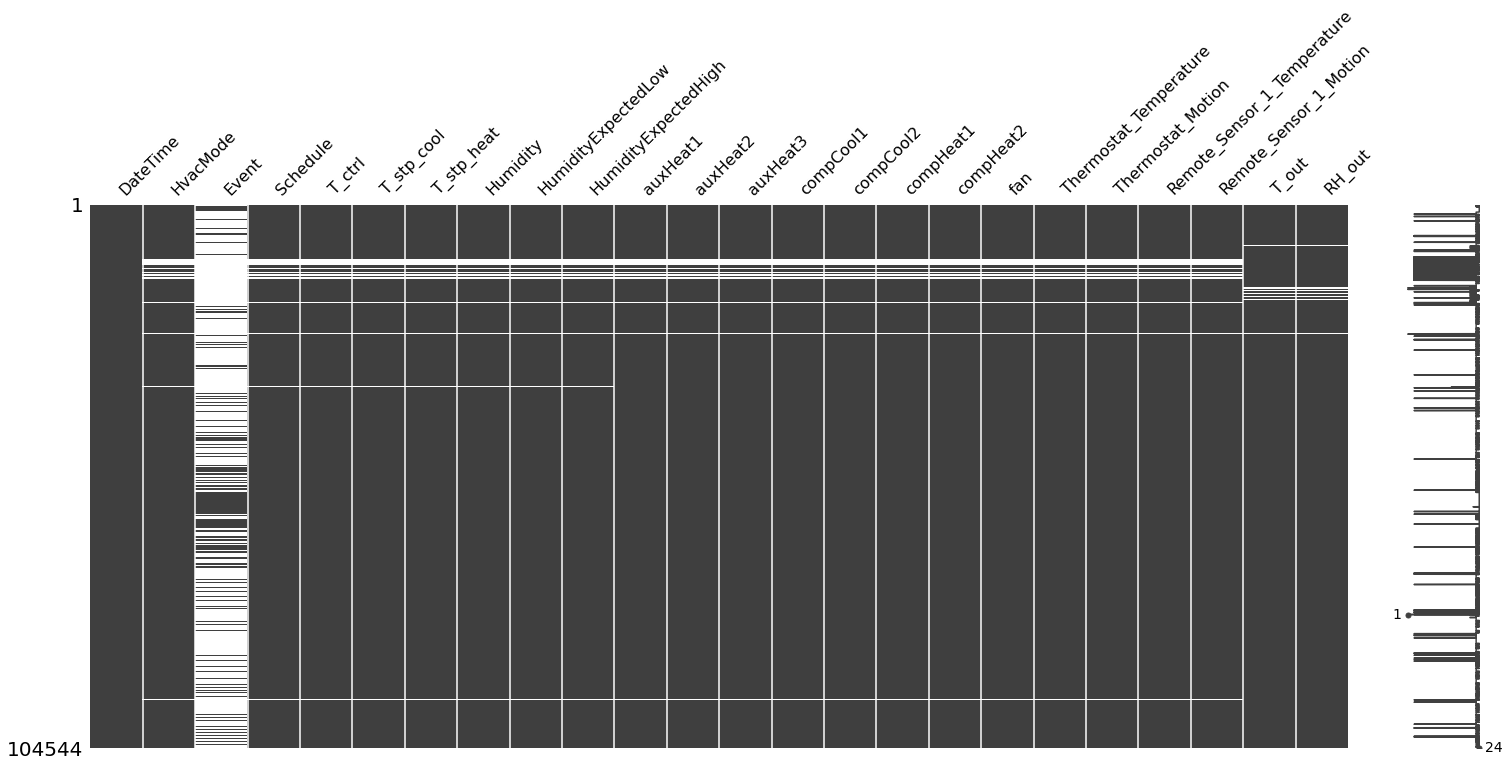

In [ ]:
# visualization null values
msno.matrix(df)

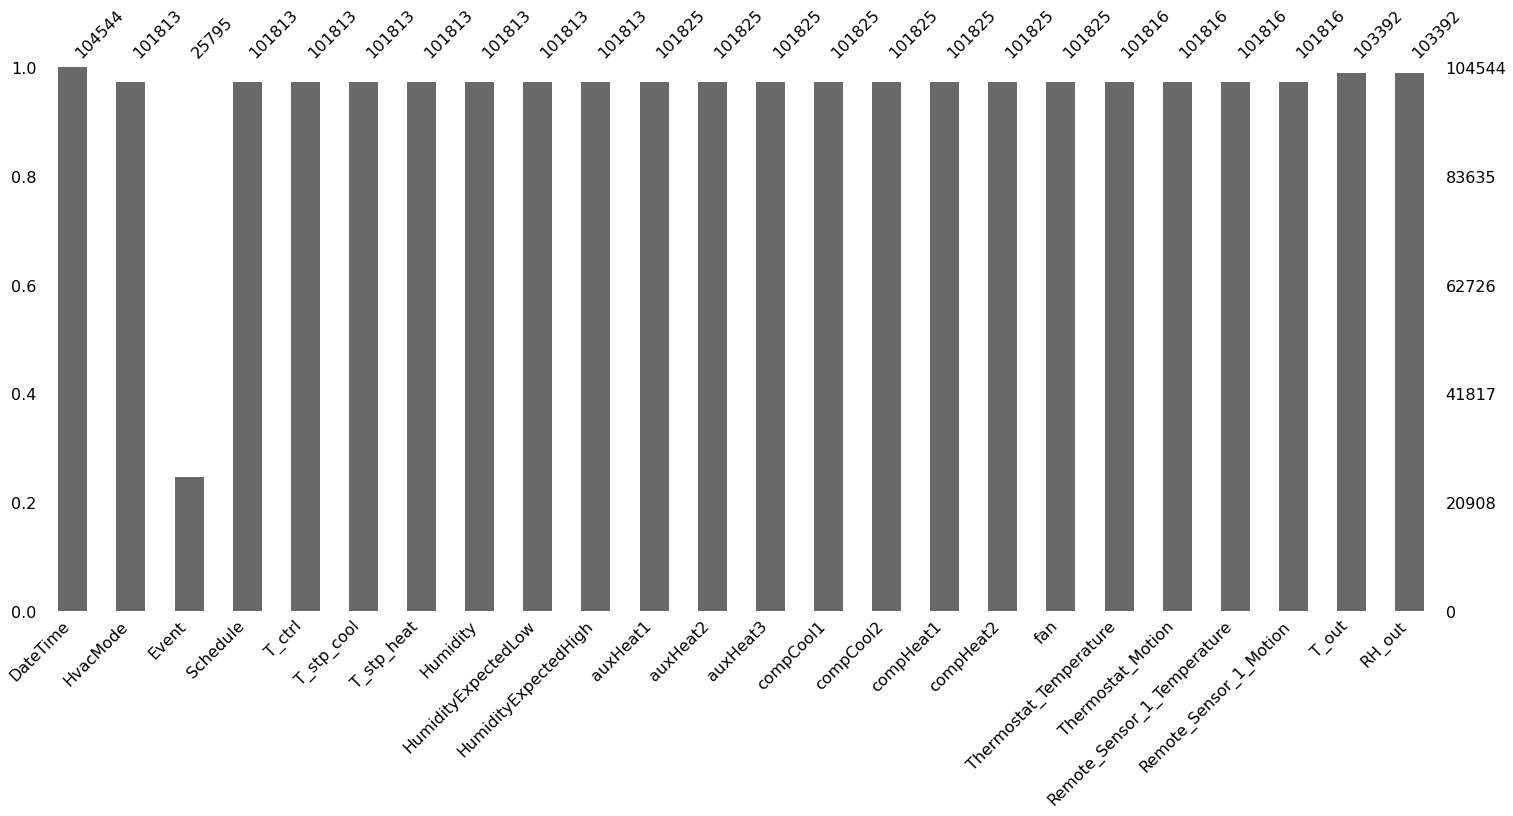

In [ ]:
msno.bar(df)

The matrix is more easier to read and more intuitive to interpret.
The bar plot shows the percentage of non-missing data in each column with respect to the total number of rows. It appears that the Event column has quite a bit of missing data. This will be taken care of first before plotting the data.

In [ ]:
# remove missing data for other variables
df = df.drop(df[df['HvacMode'].isnull()].index.tolist())
df = df.drop(df[df['RH_out'].isnull()].index.tolist())
#df = df["Event"].fillna("None", inplace = True) # This results in a NoneType/Object error for isnull.sum()
# rechecking the number of null values in each column
df.isnull().sum()

DateTime                           0
HvacMode                           0
Event                          75164
Schedule                           0
T_ctrl                             0
T_stp_cool                         0
T_stp_heat                         0
Humidity                           0
HumidityExpectedLow                0
HumidityExpectedHigh               0
auxHeat1                           0
auxHeat2                           0
auxHeat3                           0
compCool1                          0
compCool2                          0
compHeat1                          0
compHeat2                          0
fan                                0
Thermostat_Temperature             0
Thermostat_Motion                  0
Remote_Sensor_1_Temperature        0
Remote_Sensor_1_Motion             0
T_out                              0
RH_out                             0
dtype: int64

In [ ]:
df.head()

,DateTime,HvacMode,Event,Schedule,T_ctrl,T_stp_cool,T_stp_heat,Humidity,HumidityExpectedLow,HumidityExpectedHigh,...,compCool2,compHeat1,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
0,2019-01-01 00:00:00,heat,NaN,Sleep,70.0,71.0,63.0,38.0,0.0,0.0,...,0.0,0.0,0.0,45.0,71.0,1.0,69.0,0.0,41.0,95.0
1,2019-01-01 00:05:00,heat,NaN,Sleep,70.0,71.0,63.0,39.0,0.0,0.0,...,0.0,0.0,0.0,255.0,71.0,1.0,69.0,0.0,41.0,95.0
2,2019-01-01 00:10:00,heat,NaN,Sleep,70.0,71.0,63.0,39.0,0.0,0.0,...,0.0,0.0,0.0,0.0,71.0,1.0,69.0,0.0,41.0,95.0
3,2019-01-01 00:15:00,heat,NaN,Sleep,70.0,71.0,63.0,39.0,0.0,0.0,...,0.0,0.0,0.0,45.0,71.0,1.0,69.0,0.0,41.0,95.0
4,2019-01-01 00:20:00,heat,NaN,Sleep,70.0,71.0,63.0,38.0,0.0,0.0,...,0.0,0.0,0.0,255.0,71.0,1.0,69.0,0.0,41.0,95.0


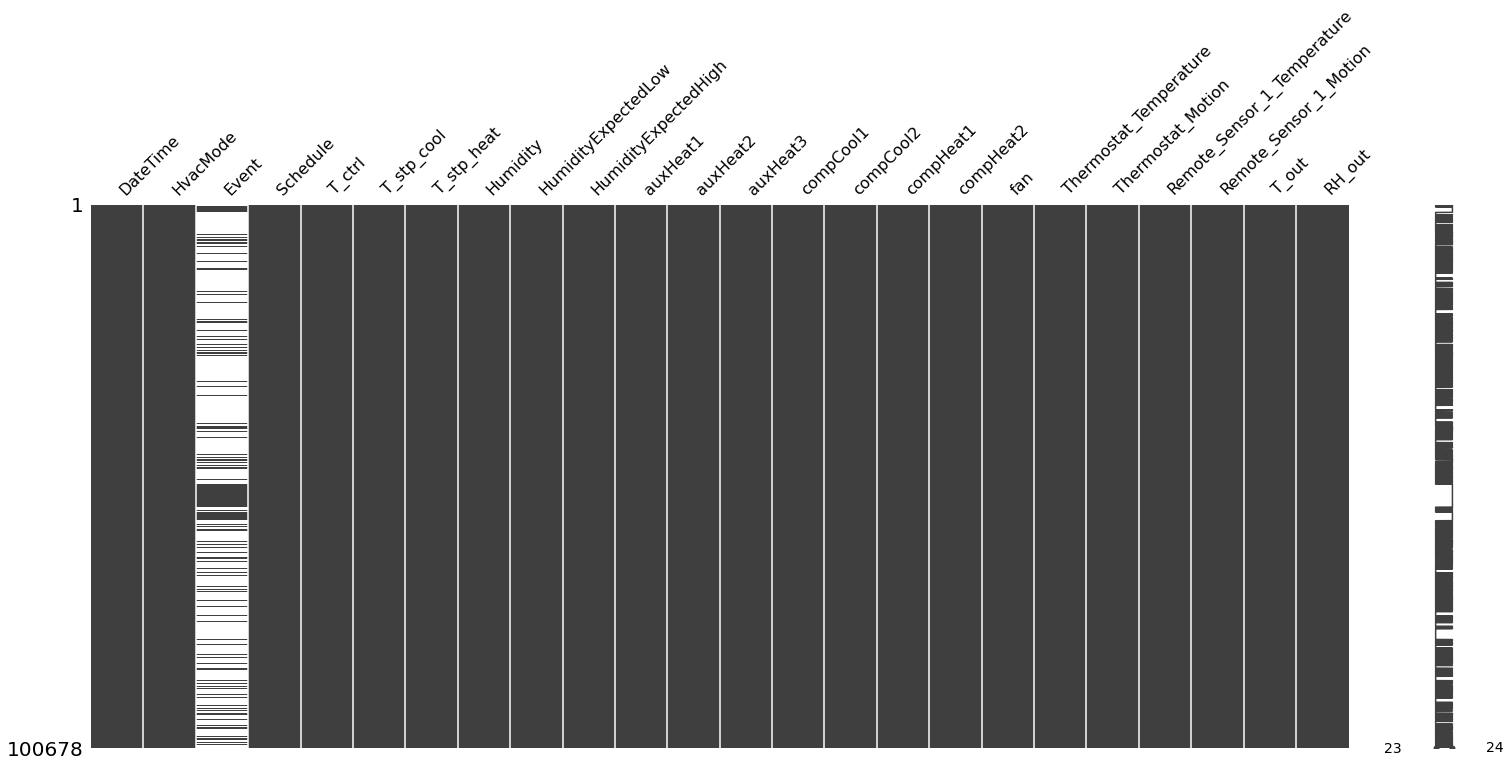

In [ ]:
msno.matrix(df)

Now we can start visualizing our data

In [ ]:
corr = df.corr() # starting with the correlation between variables
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,T_ctrl,T_stp_cool,T_stp_heat,Humidity,HumidityExpectedLow,HumidityExpectedHigh,auxHeat1,auxHeat2,auxHeat3,compCool1,compCool2,compHeat1,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
T_ctrl,1.000000,0.287987,0.134182,0.425890,nan,nan,-0.237266,nan,nan,0.252796,nan,nan,nan,0.243689,0.956995,0.111516,0.881661,0.011850,0.655832,-0.227262
T_stp_cool,0.287987,1.000000,-0.079636,0.063160,nan,nan,0.016031,nan,nan,-0.107679,nan,nan,nan,-0.044321,0.279602,-0.010536,0.265807,-0.025679,0.158921,-0.112607
T_stp_heat,0.134182,-0.079636,1.000000,-0.089533,nan,nan,0.299636,nan,nan,0.085761,nan,nan,nan,-0.097915,0.209764,0.345141,0.024844,0.138127,-0.040632,-0.156207
Humidity,0.425890,0.063160,-0.089533,1.000000,nan,nan,-0.327238,nan,nan,0.214053,nan,nan,nan,0.586604,0.370804,-0.024551,0.534574,-0.002438,0.817879,0.096645
HumidityExpectedLow,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HumidityExpectedHigh,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
auxHeat1,-0.237266,0.016031,0.299636,-0.327238,nan,nan,1.000000,nan,nan,-0.107667,nan,nan,nan,-0.407333,-0.217762,0.100987,-0.239594,0.089002,-0.345402,0.033612
auxHeat2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
auxHeat3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
compCool1,0.252796,-0.107679,0.085761,0.214053,nan,nan,-0.107667,nan,nan,1.000000,nan,nan,nan,0.302298,0.178979,0.025272,0.358987,0.028941,0.409657,-0.145037


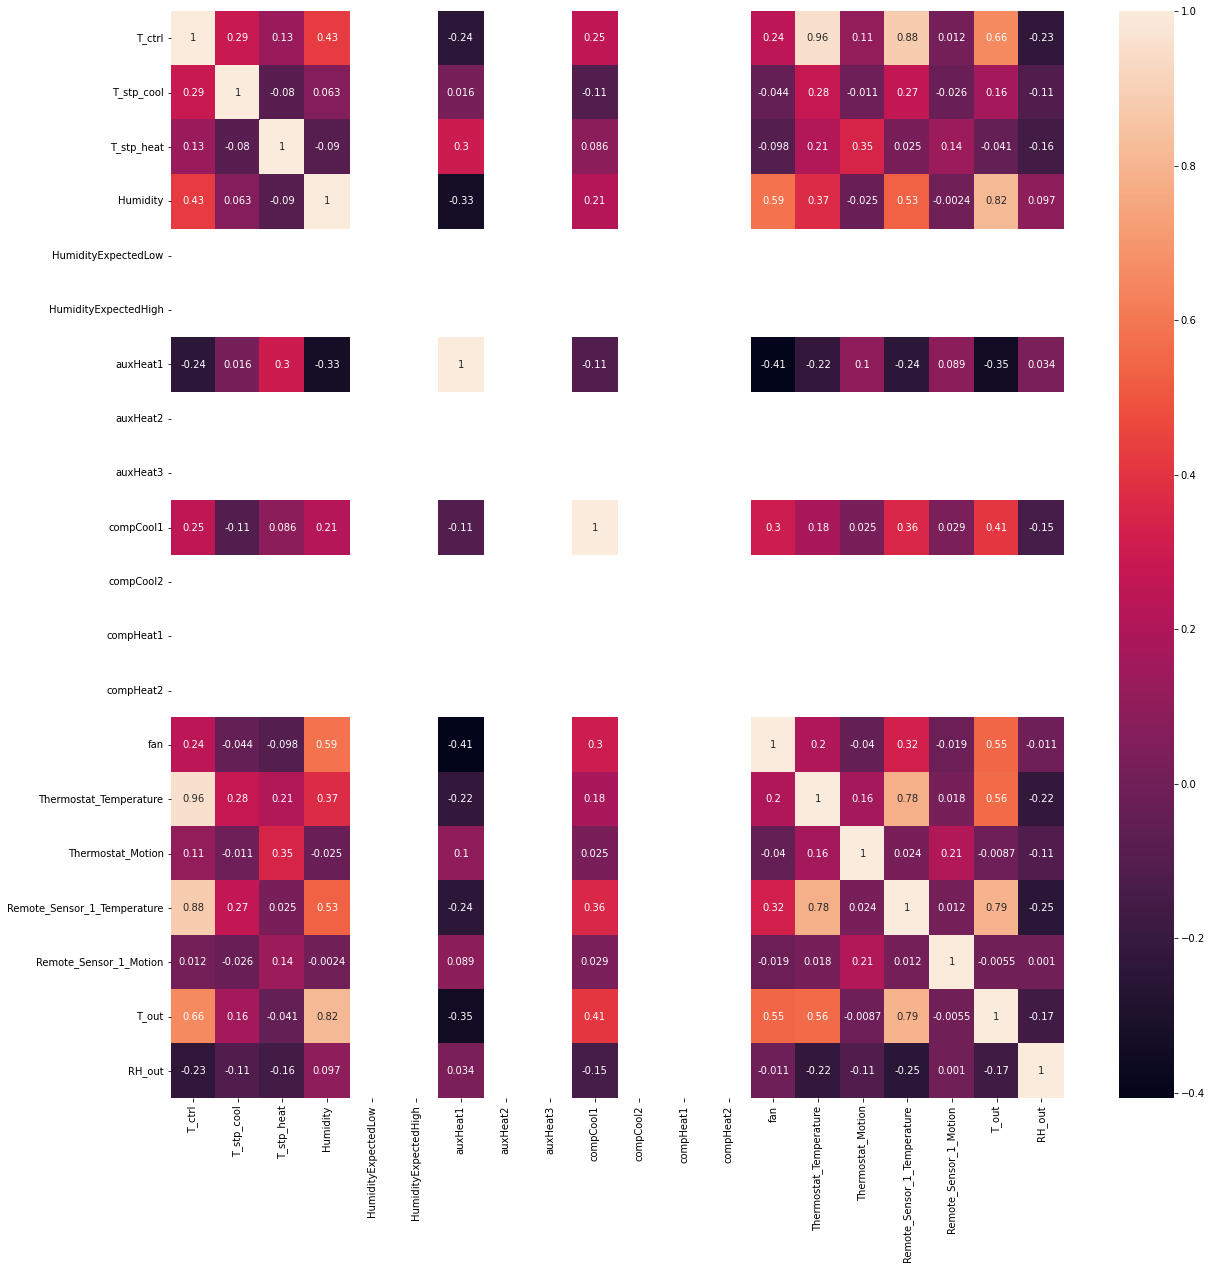

In [ ]:
# replotting corrletion matrix using seaborn
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot=True)

Correlations of interest include (>= +/- 0.5): 
 
1.   Thermostat_Temperature & T_ctrl (0.96)
2.   Remote_Sensor_1_Temperature & T_ctrl (0.88)
1.   T_out & T_ctrl (0.66)
2.   Fan & Humdity (0.59)
3.   Remote_Sensor_1_Temperature & Humdity (0.54)
4.   T_out & Humdity (0.82)
5.   T_out & fan (0.55)
6.   Thermostat_Temperature & T_out (0.56)
7.    Remote_Sensor_1_Temperature & T_out (0.79)


Need to convert and add date time variables

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df["date"] = pd.DatetimeIndex(df['DateTime']).date # add date column
df["Year"] = pd.DatetimeIndex(df['DateTime']).year # add year column
df["Month"] = pd.DatetimeIndex(df['DateTime']).month # add month column
df["Day"] = pd.DatetimeIndex(df['DateTime']).day # add day column
df["Hour"] = pd.DatetimeIndex(df['DateTime']).hour # add hour column
df["Weekday"] = pd.DatetimeIndex(df['DateTime']).dayofweek # add day of the week column
# set date as index
df.set_index('date',inplace=True) 
df.head()

,DateTime,HvacMode,Event,Schedule,T_ctrl,T_stp_cool,T_stp_heat,Humidity,HumidityExpectedLow,HumidityExpectedHigh,...,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,Year,Month,Day,Hour,Weekday
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019-01-01 00:00:00,heat,NaN,Sleep,70.0,71.0,63.0,38.0,0.0,0.0,...,1.0,69.0,0.0,41.0,95.0,2019,1,1,0,1
2019-01-01,2019-01-01 00:05:00,heat,NaN,Sleep,70.0,71.0,63.0,39.0,0.0,0.0,...,1.0,69.0,0.0,41.0,95.0,2019,1,1,0,1
2019-01-01,2019-01-01 00:10:00,heat,NaN,Sleep,70.0,71.0,63.0,39.0,0.0,0.0,...,1.0,69.0,0.0,41.0,95.0,2019,1,1,0,1
2019-01-01,2019-01-01 00:15:00,heat,NaN,Sleep,70.0,71.0,63.0,39.0,0.0,0.0,...,1.0,69.0,0.0,41.0,95.0,2019,1,1,0,1
2019-01-01,2019-01-01 00:20:00,heat,NaN,Sleep,70.0,71.0,63.0,38.0,0.0,0.0,...,1.0,69.0,0.0,41.0,95.0,2019,1,1,0,1


In [ ]:
# rearrange columns for better readability, left out year as it causes issues for some reason
df = df[['Weekday', 'Month','Hour', 'Day','DateTime', 'HvacMode',
                         'Event', 'Schedule', 'T_ctrl', 'T_stp_cool',
                         'T_stp_heat', 'Humidity', 'HumidityExpectedLow', 'HumidityExpectedHigh',
                         'auxHeat1', 'auxHeat2', 'auxHeat3', 'compCool1', 'compCool2',
                         'compHeat1', 'compHeat2', 'fan', 'Thermostat_Temperature',
                         'Thermostat_Motion', 'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion', 'T_out', 'RH_out']]
df.head()

,Weekday,Month,Hour,Day,DateTime,HvacMode,Event,Schedule,T_ctrl,T_stp_cool,...,compCool2,compHeat1,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,1,0,1,2019-01-01 00:00:00,heat,NaN,Sleep,70.0,71.0,...,0.0,0.0,0.0,45.0,71.0,1.0,69.0,0.0,41.0,95.0
2019-01-01,1,1,0,1,2019-01-01 00:05:00,heat,NaN,Sleep,70.0,71.0,...,0.0,0.0,0.0,255.0,71.0,1.0,69.0,0.0,41.0,95.0
2019-01-01,1,1,0,1,2019-01-01 00:10:00,heat,NaN,Sleep,70.0,71.0,...,0.0,0.0,0.0,0.0,71.0,1.0,69.0,0.0,41.0,95.0
2019-01-01,1,1,0,1,2019-01-01 00:15:00,heat,NaN,Sleep,70.0,71.0,...,0.0,0.0,0.0,45.0,71.0,1.0,69.0,0.0,41.0,95.0
2019-01-01,1,1,0,1,2019-01-01 00:20:00,heat,NaN,Sleep,70.0,71.0,...,0.0,0.0,0.0,255.0,71.0,1.0,69.0,0.0,41.0,95.0


Since the 'Event' column has a lot of missing data and not apart of any strong correlations it will be removed.

In [ ]:
df = df.drop(labels = ['Event'], axis = 1)
# rechecking the number of null values in each column
df.isnull().sum()

Weekday                        0
Month                          0
Hour                           0
Day                            0
DateTime                       0
HvacMode                       0
Schedule                       0
T_ctrl                         0
T_stp_cool                     0
T_stp_heat                     0
Humidity                       0
HumidityExpectedLow            0
HumidityExpectedHigh           0
auxHeat1                       0
auxHeat2                       0
auxHeat3                       0
compCool1                      0
compCool2                      0
compHeat1                      0
compHeat2                      0
fan                            0
Thermostat_Temperature         0
Thermostat_Motion              0
Remote_Sensor_1_Temperature    0
Remote_Sensor_1_Motion         0
T_out                          0
RH_out                         0
dtype: int64

In [ ]:
df.describe() # statistical summary

,Weekday,Month,Hour,Day,T_ctrl,T_stp_cool,T_stp_heat,Humidity,HumidityExpectedLow,HumidityExpectedHigh,...,compCool2,compHeat1,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
count,100678.000000,100678.000000,100678.000000,100678.000000,100678.000000,100678.000000,100678.000000,100678.000000,100678.0,100678.0,...,100678.0,100678.0,100678.0,100678.000000,100678.000000,100678.000000,100678.000000,100678.000000,100678.00000,100678.000000
mean,3.001996,6.686724,11.451419,15.793629,70.377898,72.184449,66.562913,36.839369,0.0,0.0,...,0.0,0.0,0.0,179.752677,70.075051,0.218856,70.640080,0.072151,48.58850,69.054163
std,1.997154,3.407402,6.940009,8.820688,2.633596,1.500680,3.603314,9.593703,0.0,0.0,...,0.0,0.0,0.0,128.363917,2.668926,0.413473,2.922468,0.258739,18.88307,14.409309
min,0.000000,1.000000,0.000000,1.000000,62.000000,62.000000,61.000000,14.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,61.000000,0.000000,60.000000,0.000000,-6.00000,24.000000
25%,1.000000,4.000000,5.000000,8.000000,69.000000,71.000000,64.000000,29.000000,0.0,0.0,...,0.0,0.0,0.0,30.000000,69.000000,0.000000,69.000000,0.000000,34.00000,59.000000
50%,3.000000,7.000000,11.000000,16.000000,70.000000,72.000000,66.000000,38.000000,0.0,0.0,...,0.0,0.0,0.0,255.000000,70.000000,0.000000,70.000000,0.000000,49.00000,70.000000
75%,5.000000,10.000000,17.000000,23.000000,72.000000,73.000000,70.000000,45.000000,0.0,0.0,...,0.0,0.0,0.0,300.000000,72.000000,0.000000,73.000000,0.000000,65.00000,80.000000
max,6.000000,12.000000,23.000000,31.000000,81.000000,79.000000,79.000000,67.000000,0.0,0.0,...,0.0,0.0,0.0,300.000000,81.000000,1.000000,81.000000,1.000000,90.00000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100678 entries, 2019-01-01 to 2019-12-31
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Weekday                      100678 non-null  int64         
 1   Month                        100678 non-null  int64         
 2   Hour                         100678 non-null  int64         
 3   Day                          100678 non-null  int64         
 4   DateTime                     100678 non-null  datetime64[ns]
 5   HvacMode                     100678 non-null  object        
 6   Schedule                     100678 non-null  object        
 7   T_ctrl                       100678 non-null  float64       
 8   T_stp_cool                   100678 non-null  float64       
 9   T_stp_heat                   100678 non-null  float64       
 10  Humidity                     100678 non-null  float64       
 11  HumidityExpectedLo

Start plotting the data starting with a histogram to see disrtubtion of each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9555b091d0>,
      dtype=object)

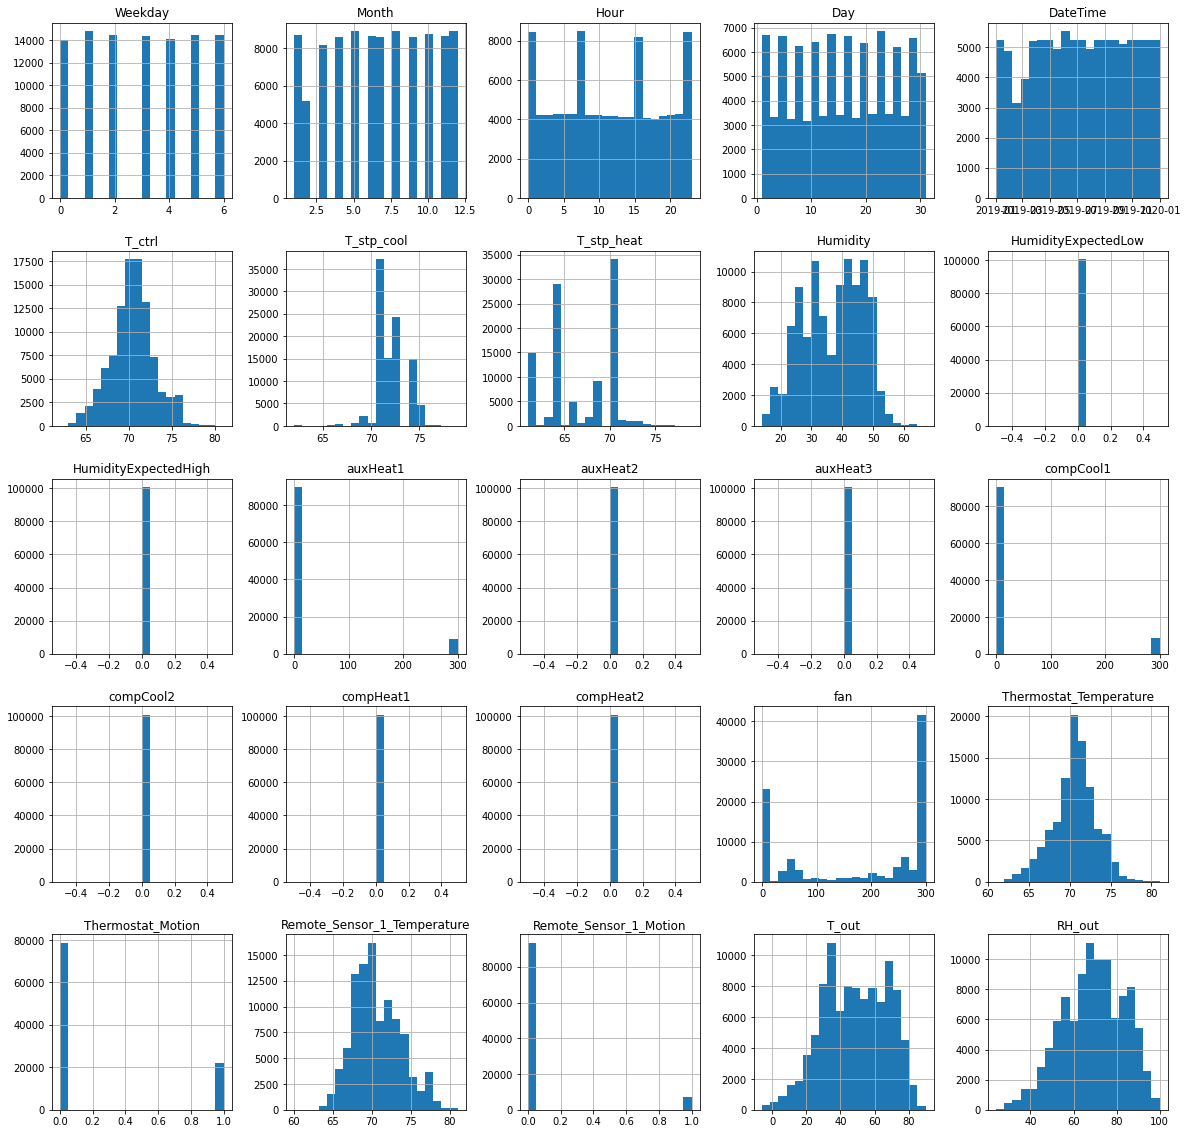

In [ ]:
df.hist(bins = 20 , figsize= (20,20)) 

It can be observed that variables like DateTime does not have a meaningful histogram. Whereas Thermostat Temperature closely resembles a normal distribution. The Target variable auxHeat1 is skewed to the values 0 and 300 seconds. This is because the data is recorded in 5 minute intervals. This can be seen by removing the values at 0 and 300 and the data must be changed into hourly intervals as seen below after lookinh at the distrubtion of the variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

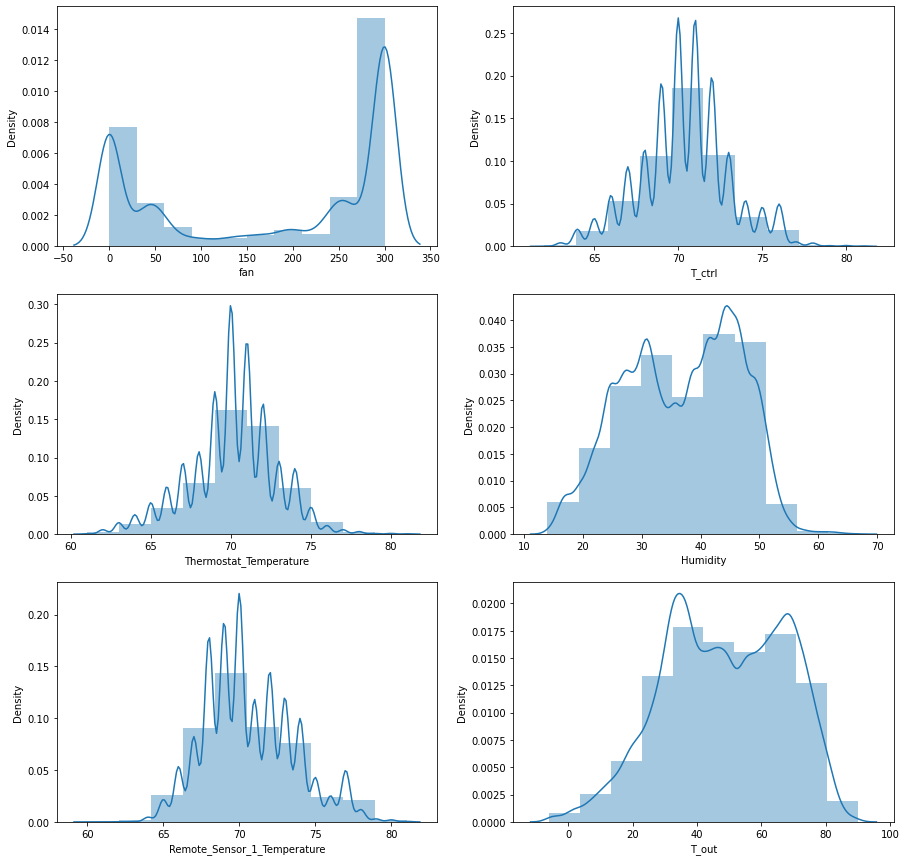

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(15,15)) # distrubtion plot in form of bar and line graph
tmp1 = sns.distplot(df["fan"], bins=10, ax = ax[0][0])
tmp2 = sns.distplot(df["T_ctrl"], bins=10, ax = ax[0][1])
tmp3 = sns.distplot(df["Thermostat_Temperature"],bins=10, ax = ax[1][0])
tmp4 = sns.distplot(df["Humidity"],bins=10, ax =ax[1][1])
tmp5 = sns.distplot(df["Remote_Sensor_1_Temperature"],bins=10,ax = ax[2][0])
tmp5 = sns.distplot(df["T_out"],bins=10, ax = ax[2][1])

In [ ]:
tmp = df[(df['auxHeat1'] != 300) & (df['auxHeat1'] != 0)]
tmp['auxHeat1']

date
2019-01-01     90.0
2019-01-01    225.0
2019-01-01     30.0
2019-01-01     90.0
2019-01-01     75.0
              ...  
2019-12-31    180.0
2019-12-31     60.0
2019-12-31    225.0
2019-12-31    240.0
2019-12-31    180.0
Name: auxHeat1, Length: 3058, dtype: float64

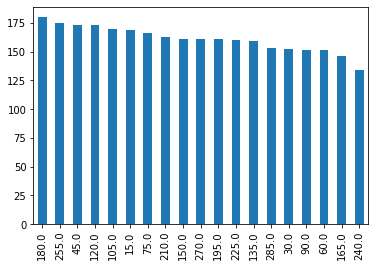

In [ ]:
tmp["auxHeat1"].value_counts().plot.bar()
plt.show()

In [ ]:
df1 = df[df['DateTime'].dt.strftime('%M:%S').eq('00:00')].copy() # create new dataframe after data transformation
df1.head(10)
# df1.to_csv(index=False) # saves the file

,Weekday,Month,Hour,Day,DateTime,HvacMode,Schedule,T_ctrl,T_stp_cool,T_stp_heat,...,compCool2,compHeat1,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,1,0,1,2019-01-01 00:00:00,heat,Sleep,70.0,71.0,63.0,...,0.0,0.0,0.0,45.0,71.0,1.0,69.0,0.0,41.0,95.0
2019-01-01,1,1,1,1,2019-01-01 01:00:00,heat,Sleep,71.0,71.0,63.0,...,0.0,0.0,0.0,45.0,71.0,1.0,69.0,0.0,42.0,94.0
2019-01-01,1,1,2,1,2019-01-01 02:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,0.0,0.0,45.0,70.0,0.0,69.0,0.0,42.0,93.0
2019-01-01,1,1,3,1,2019-01-01 03:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,0.0,0.0,45.0,69.0,0.0,69.0,0.0,39.0,90.0
2019-01-01,1,1,4,1,2019-01-01 04:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,0.0,0.0,45.0,68.0,0.0,69.0,0.0,35.0,86.0
2019-01-01,1,1,5,1,2019-01-01 05:00:00,heat,Sleep,68.0,71.0,63.0,...,0.0,0.0,0.0,45.0,68.0,0.0,69.0,0.0,35.0,85.0
2019-01-01,1,1,6,1,2019-01-01 06:00:00,heat,Sleep,68.0,71.0,63.0,...,0.0,0.0,0.0,45.0,67.0,0.0,68.0,0.0,34.0,80.0
2019-01-01,1,1,7,1,2019-01-01 07:00:00,heat,Sleep,68.0,71.0,63.0,...,0.0,0.0,0.0,0.0,67.0,0.0,68.0,0.0,34.0,77.0
2019-01-01,1,1,8,1,2019-01-01 08:00:00,heat,Home,70.0,73.0,70.0,...,0.0,0.0,0.0,0.0,69.0,0.0,71.0,0.0,34.0,75.0


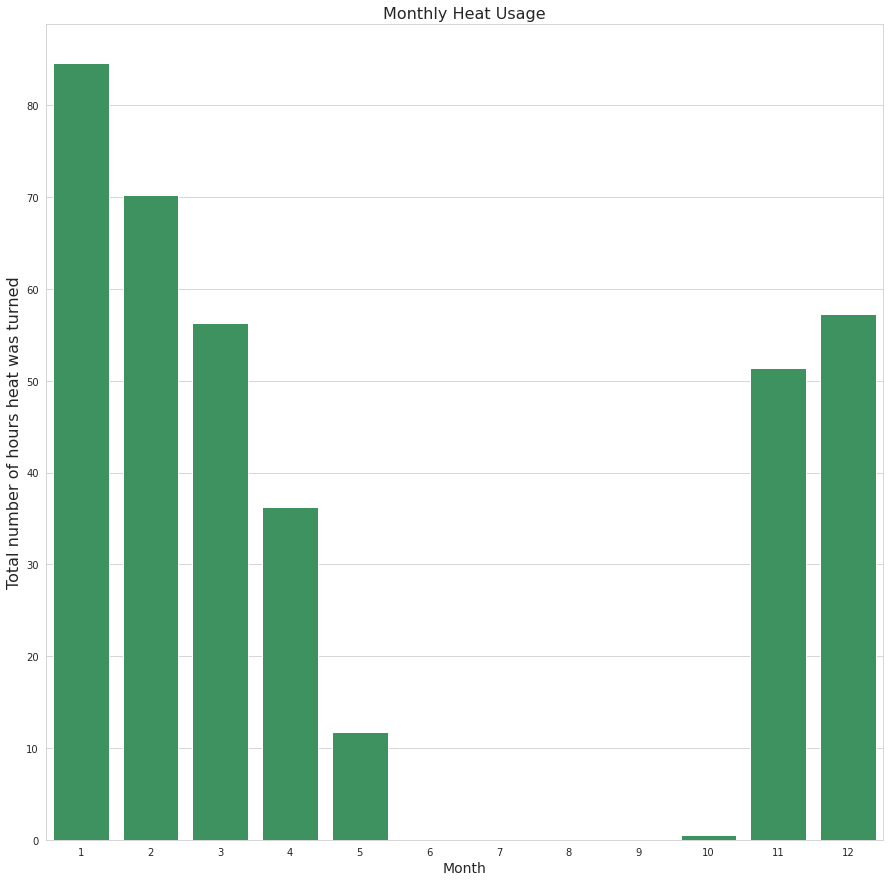

In [ ]:
plt.figure(figsize = (15, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(data = df1, x = 'Month', y = 'auxHeat1', color = '#30a05c', ci=None)
tmp.set_xlabel("Month", fontsize = 14)
tmp.set_ylabel('Total number of hours heat was turned', fontsize = 16)
tmp.ticklabel_format
plt.title('Monthly Heat Usage', fontsize = 16)
plt.show()

From this graph alone we know that during the summer months the heat is not used at all and only a little bit in the spring.

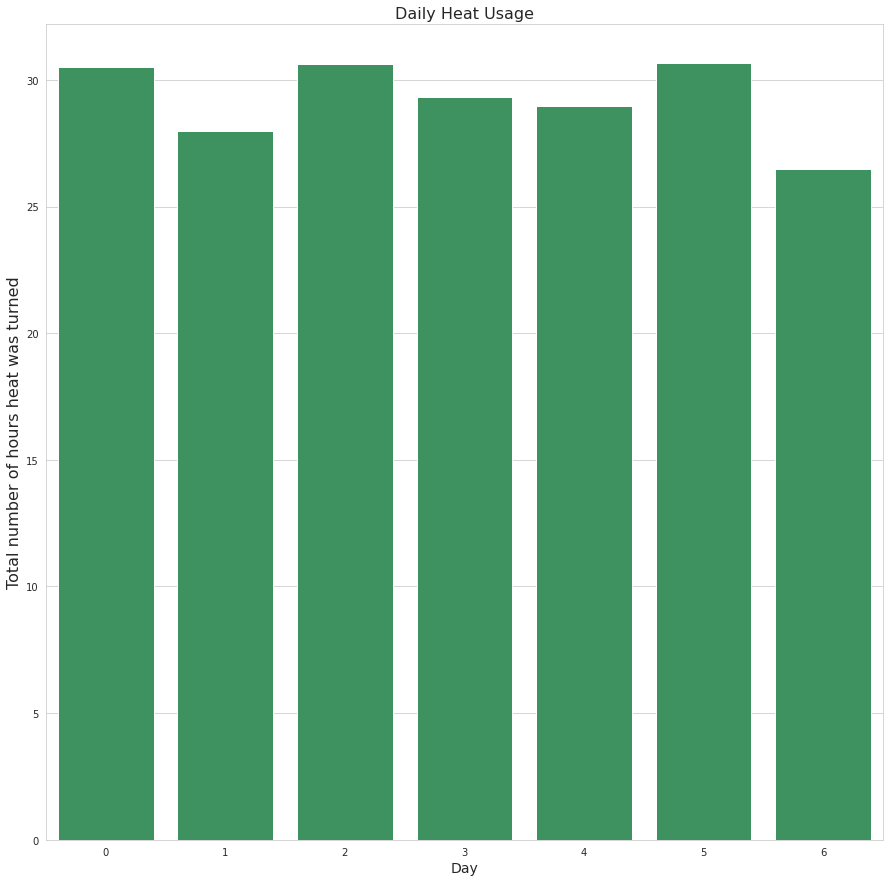

In [ ]:
plt.figure(figsize = (15, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(data = df1, x = 'Weekday', y = 'auxHeat1', color = '#30a05c', ci=None)
tmp.set_xlabel("Day", fontsize = 14)
tmp.set_ylabel('Total number of hours heat was turned', fontsize = 16)
tmp.ticklabel_format
plt.title('Daily Heat Usage', fontsize = 16)
plt.show()

It can be observed that all weekdays have more than 25 hours of heat used. With monday and saturday passing a total of 30 hours. Now let's compare the hour in every weekday.

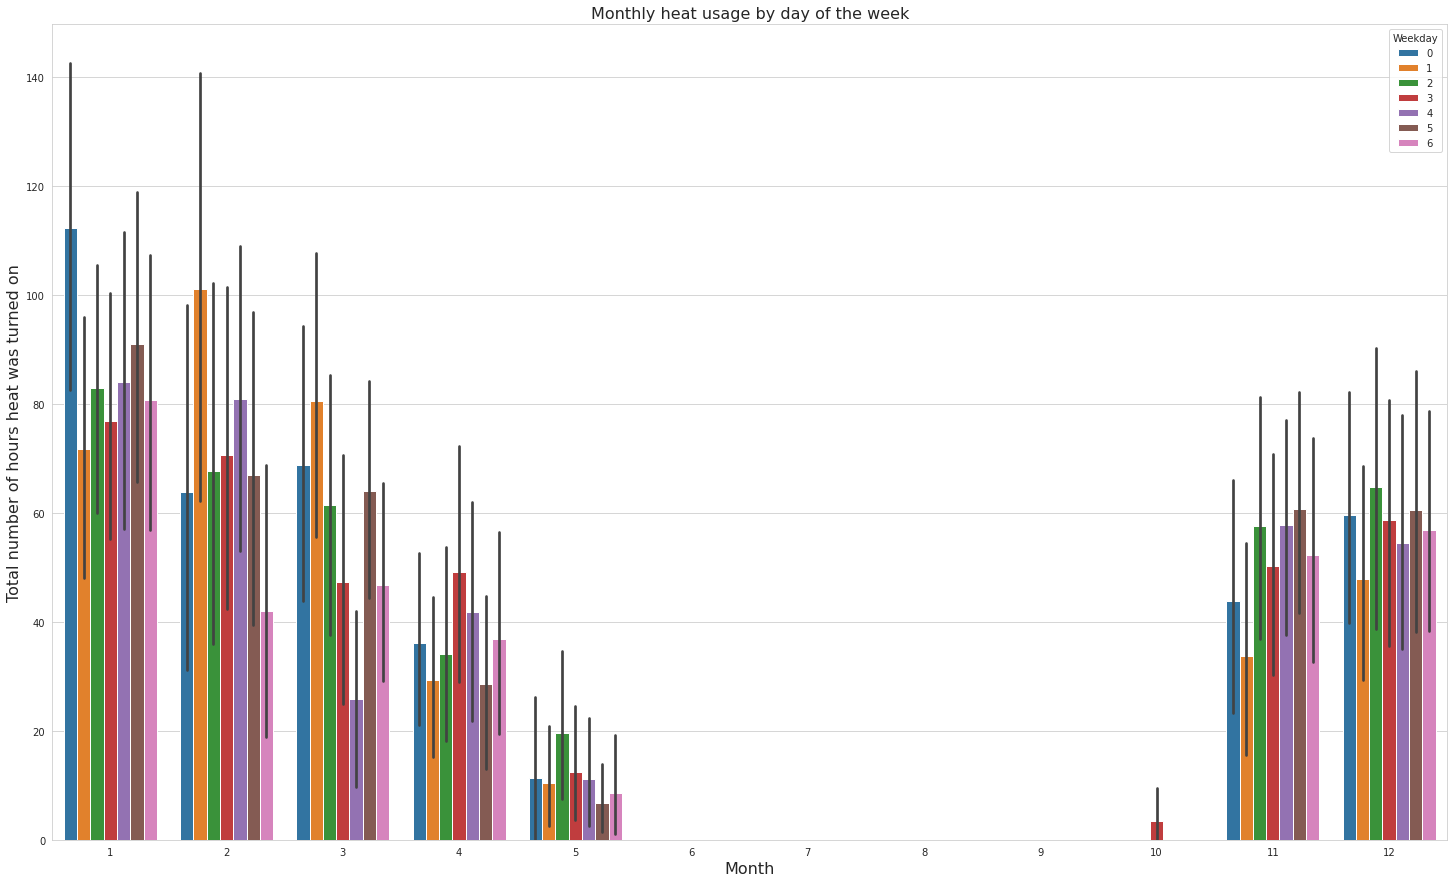

In [ ]:
plt.figure(figsize = (25, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Month", y="auxHeat1", data=df1, hue="Weekday")
tmp.set_xlabel("Month", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Monthly heat usage by day of the week', fontsize = 16)
plt.show()

Now repeat the same plot for all variables that either have a strong correlation or intuitively makes sense that it has an impact on the temperature as the hue.

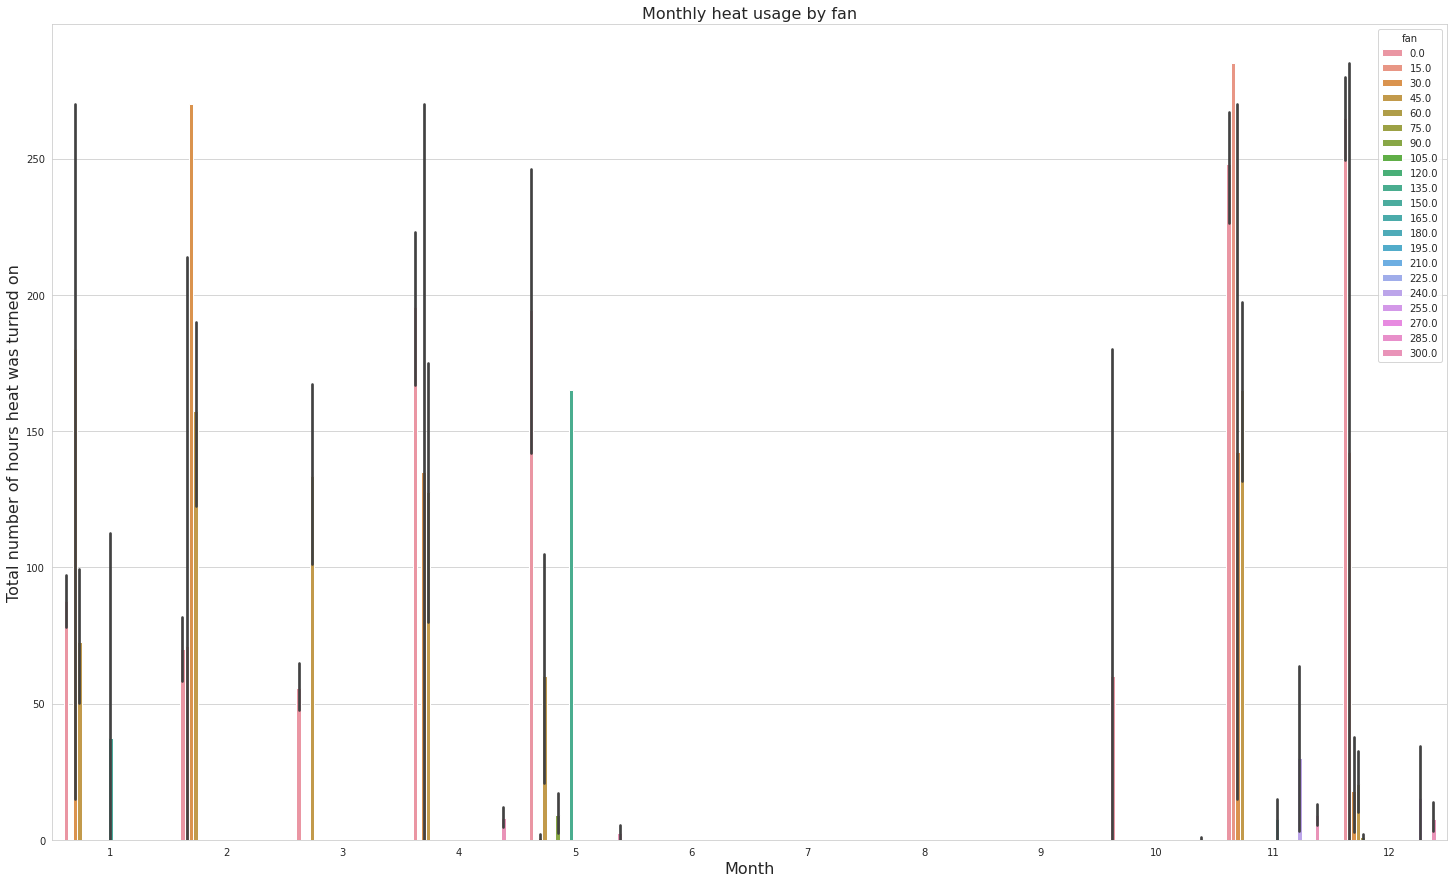

In [ ]:
plt.figure(figsize = (25, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Month", y="auxHeat1", data=df1, hue="fan")
tmp.set_xlabel("Month", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Monthly heat usage by fan', fontsize = 16)
plt.show()

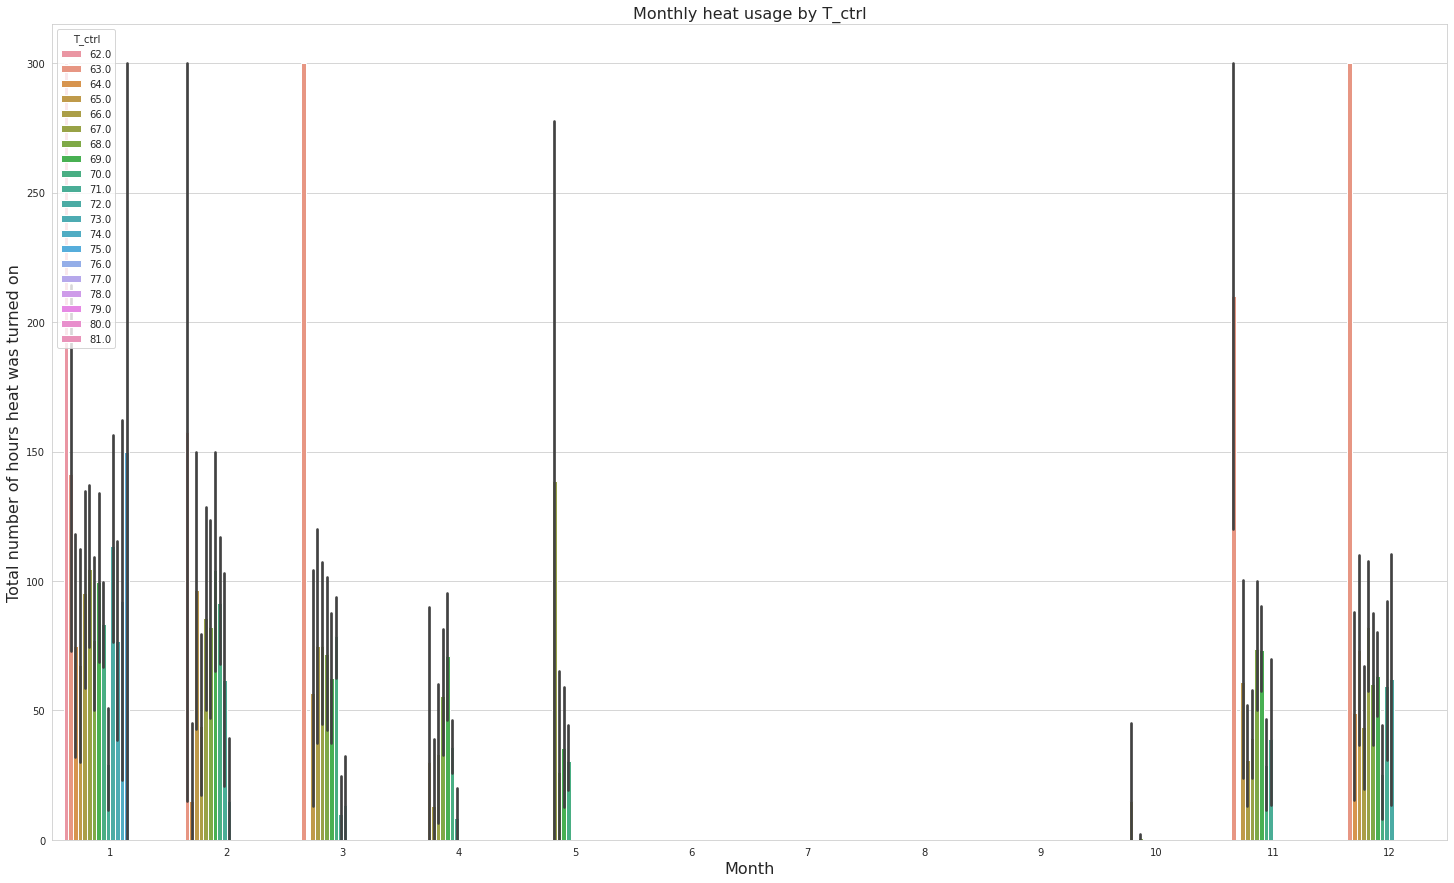

In [ ]:
plt.figure(figsize = (25, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Month", y="auxHeat1", data=df1, hue="T_ctrl")
tmp.set_xlabel("Month", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Monthly heat usage by T_ctrl', fontsize = 16)
plt.show()

At this point using the strongly correlated variables does not yield any additional insight in fact the graphs have become much more confusing. Moving forward the variables 'HvacMode' and 'Schedule' will be used.

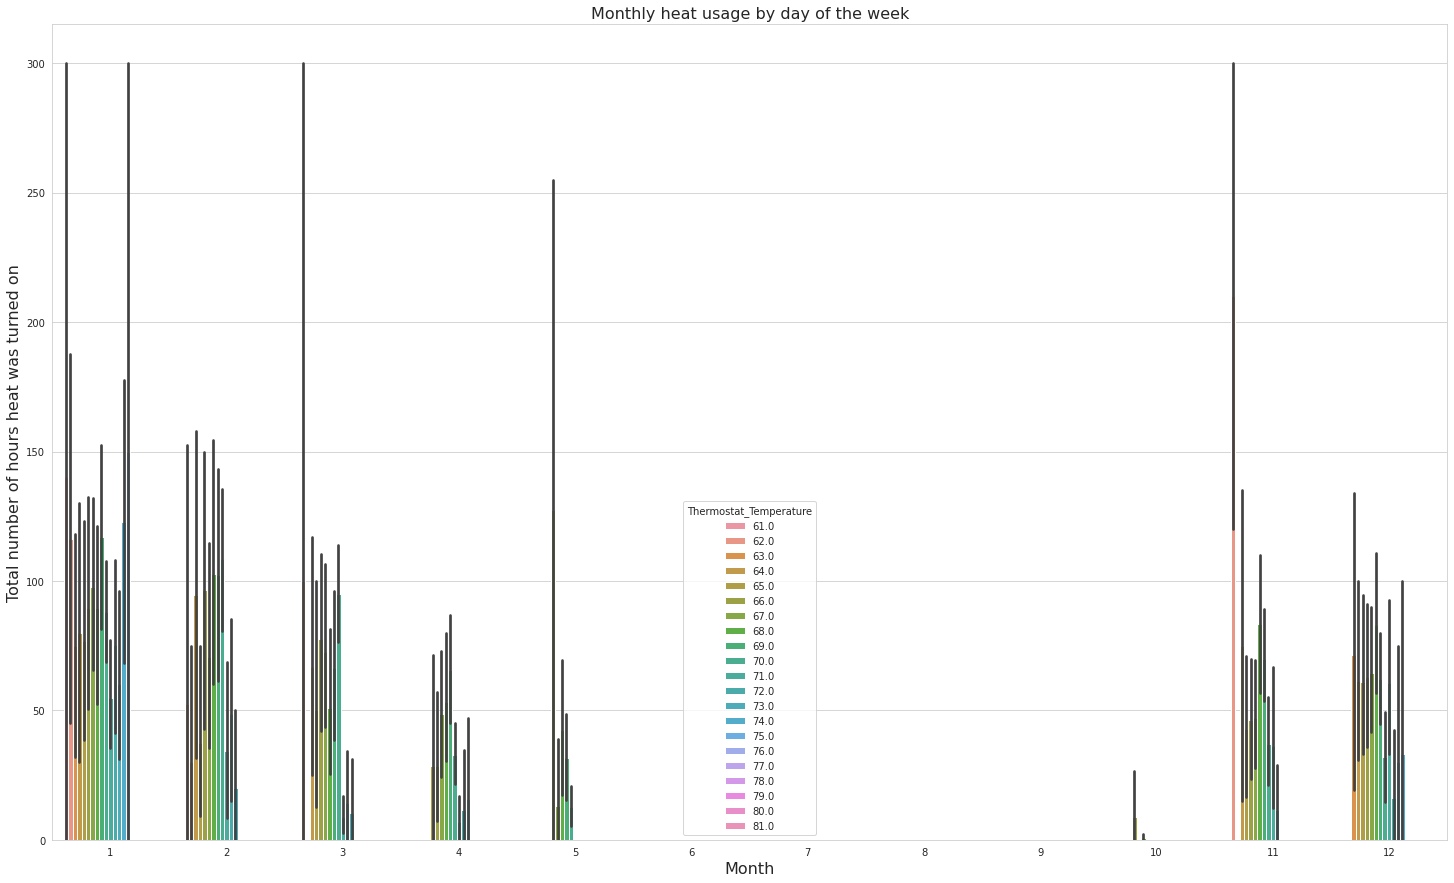

In [ ]:
plt.figure(figsize = (25, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Month", y="auxHeat1", data=df1, hue="Thermostat_Temperature")
tmp.set_xlabel("Month", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Monthly heat usage by day of the week', fontsize = 16)
plt.show()

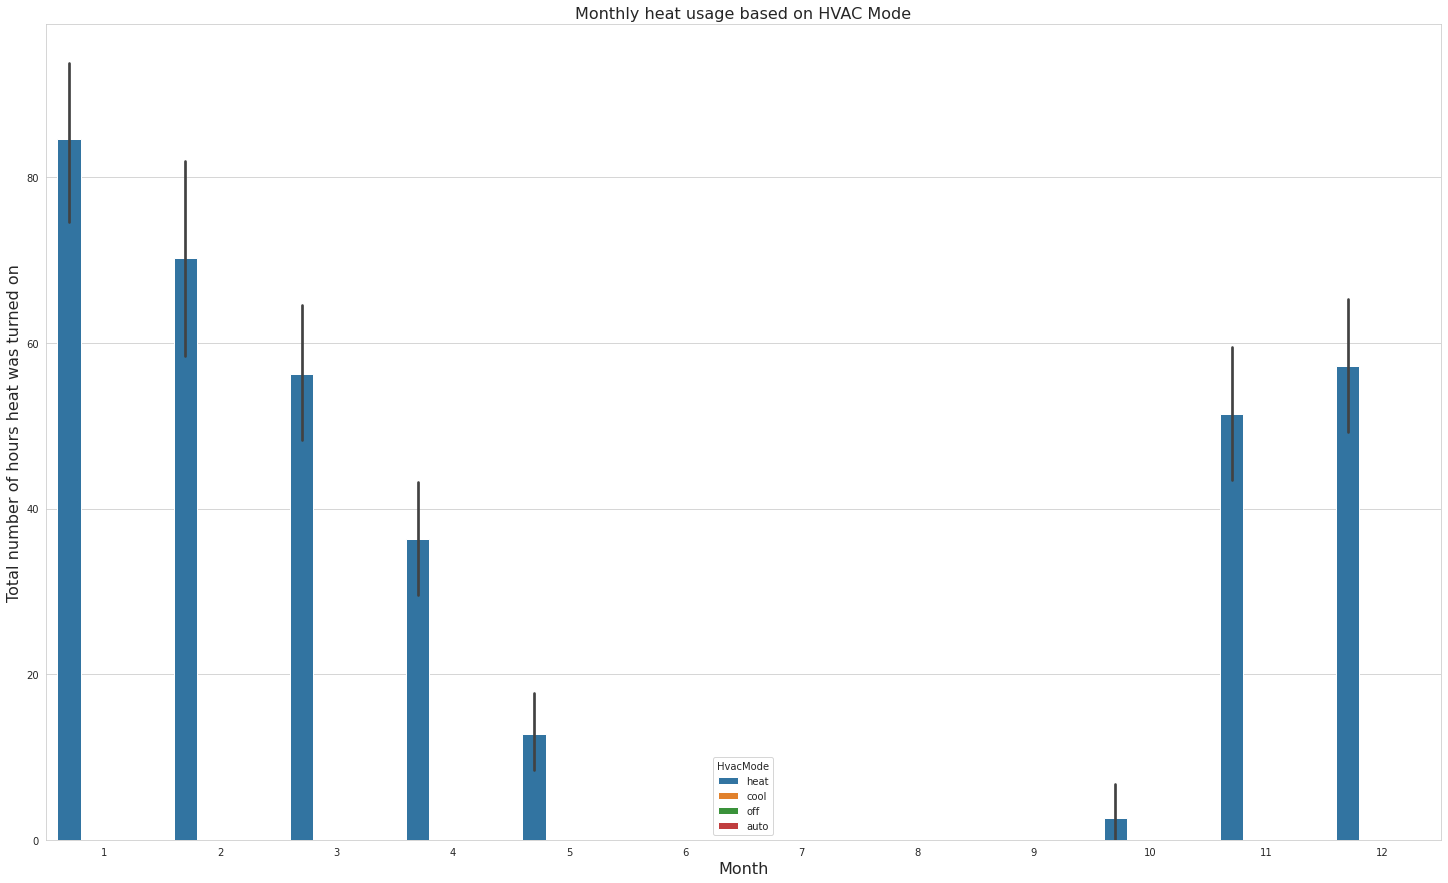

In [ ]:
plt.figure(figsize = (25, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Month", y="auxHeat1", data=df1, hue="HvacMode")
tmp.set_xlabel("Month", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Monthly heat usage based on HVAC Mode', fontsize = 16)
plt.show()

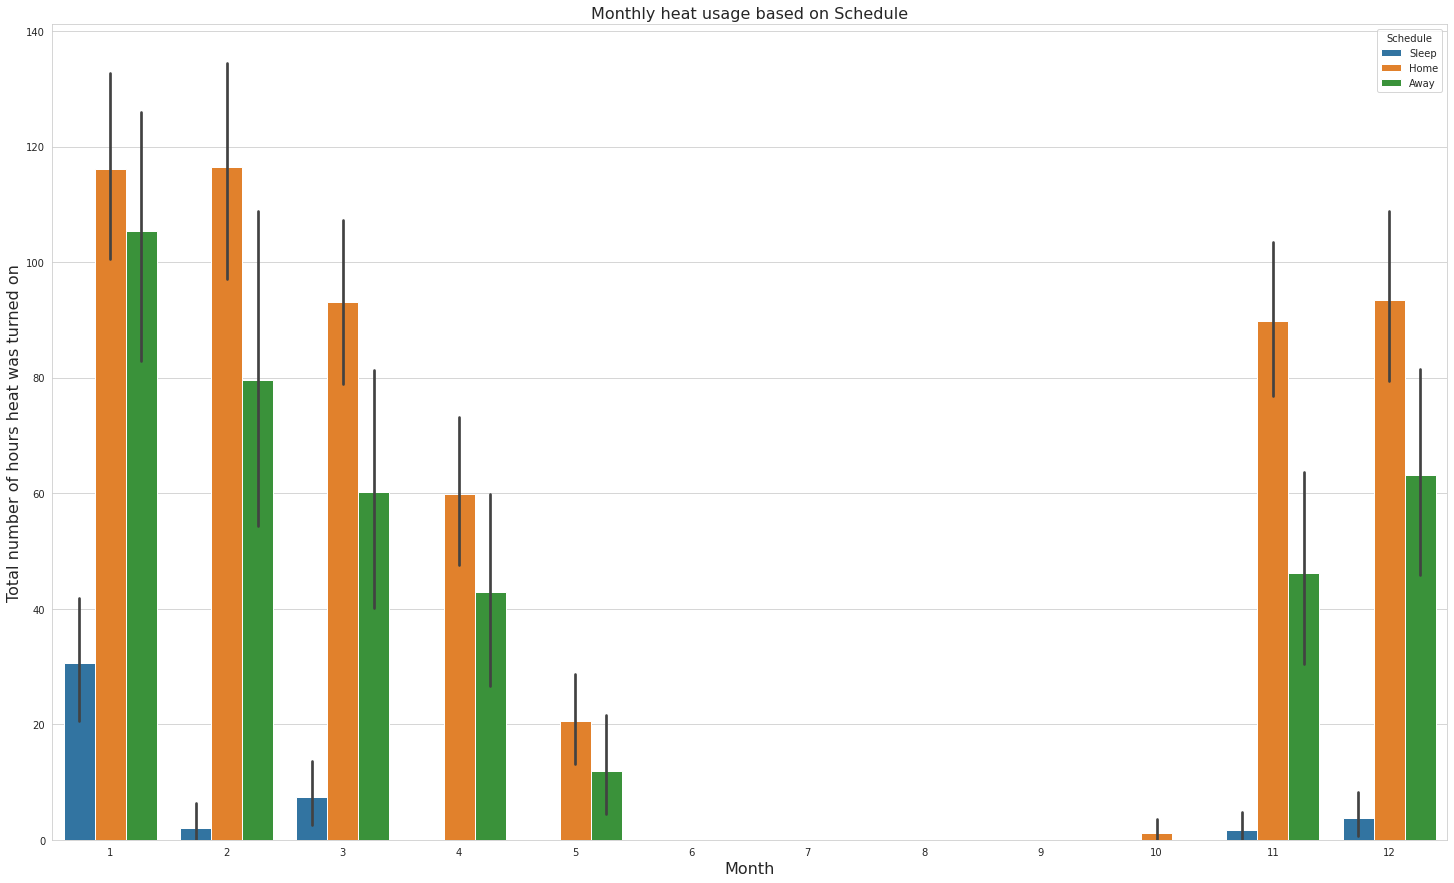

In [ ]:
plt.figure(figsize = (25, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Month", y="auxHeat1", data=df1, hue="Schedule")
tmp.set_xlabel("Month", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Monthly heat usage based on Schedule', fontsize = 16)
plt.show()

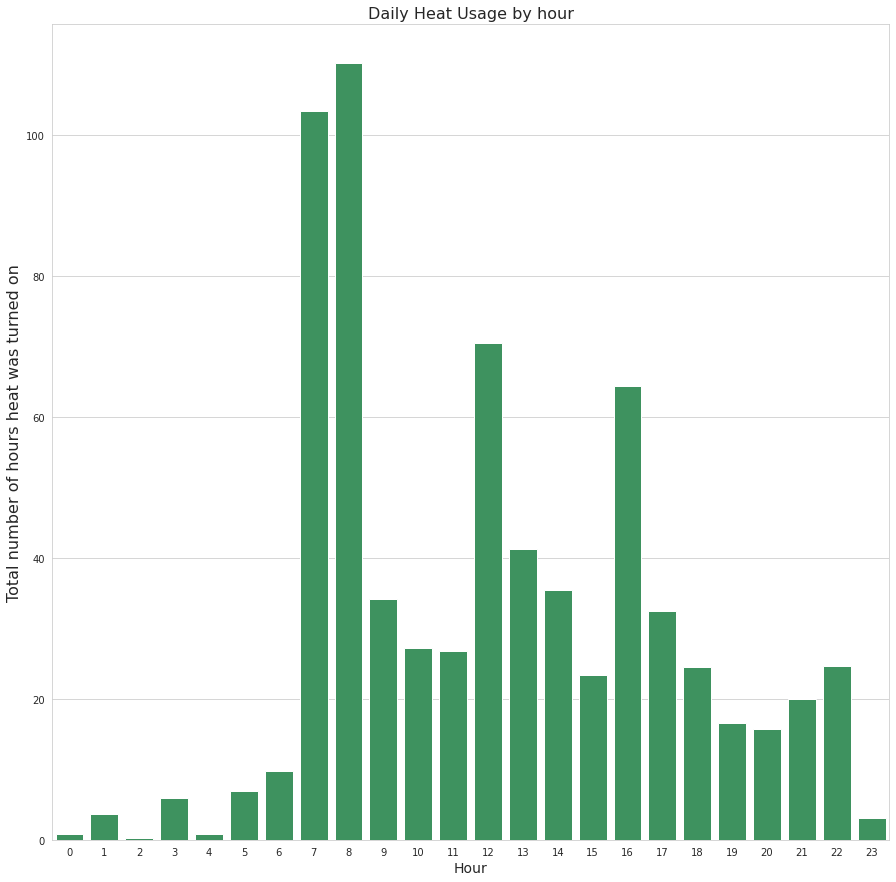

In [ ]:
plt.figure(figsize = (15, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(data = df1, x = 'Hour', y = 'auxHeat1', color = '#30a05c', ci=None)
tmp.set_xlabel("Hour", fontsize = 14)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
tmp.ticklabel_format
plt.title('Daily Heat Usage by hour', fontsize = 16)
plt.show()

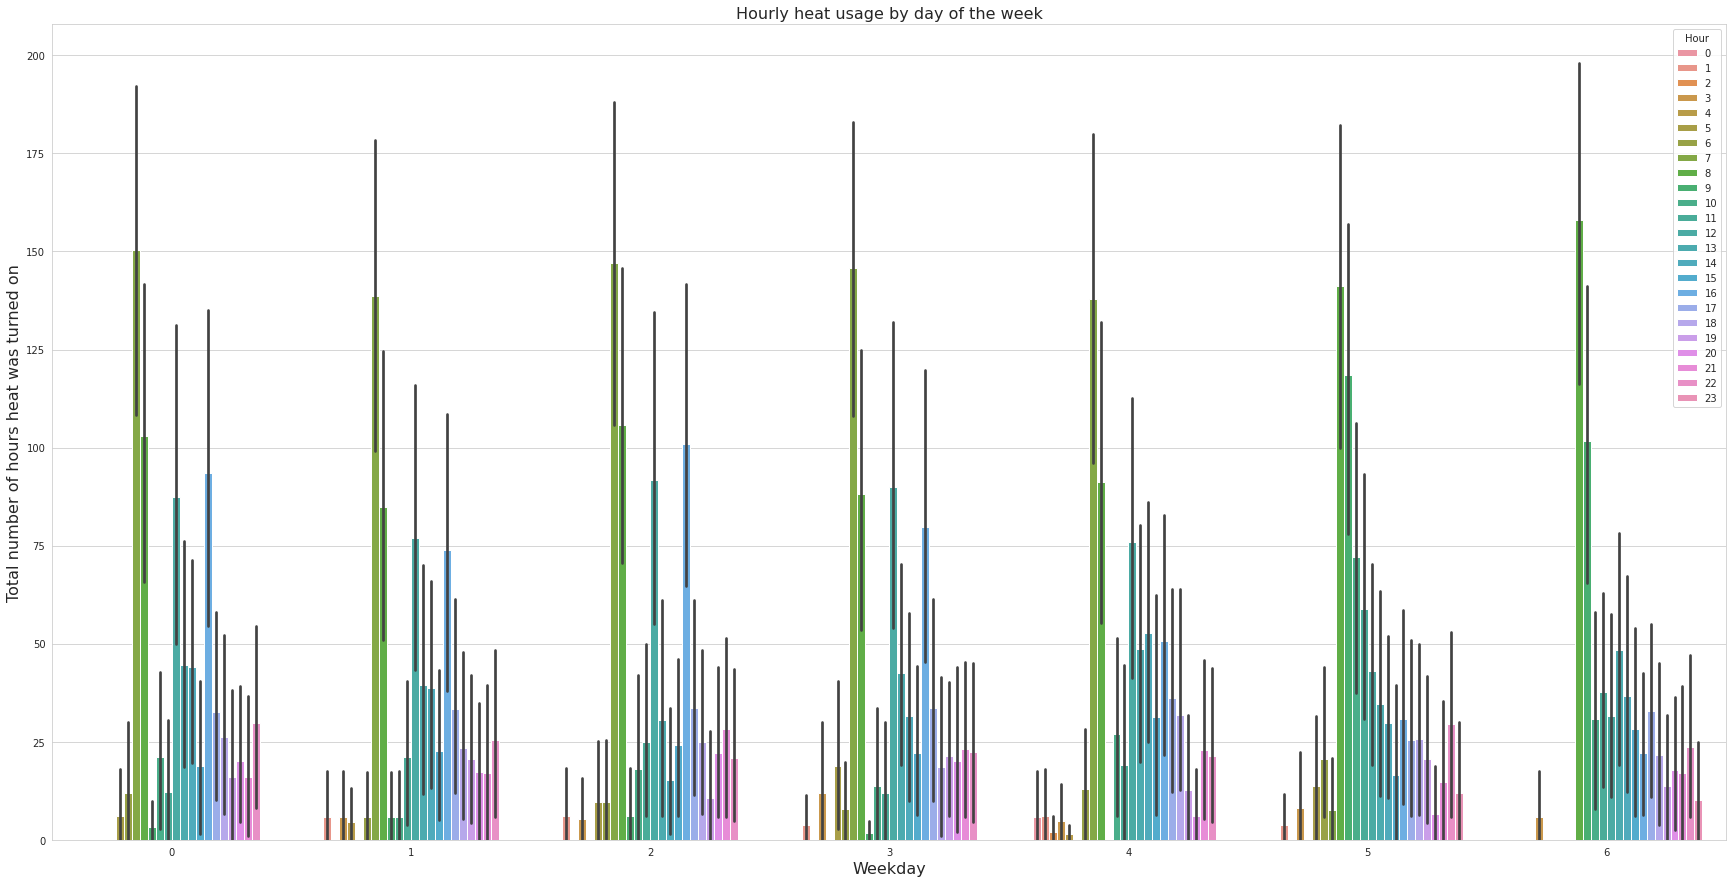

In [ ]:
plt.figure(figsize = (30, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Weekday", y="auxHeat1", data=df1, hue="Hour")
tmp.set_xlabel("Weekday", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Hourly heat usage by day of the week', fontsize = 16)
plt.show()

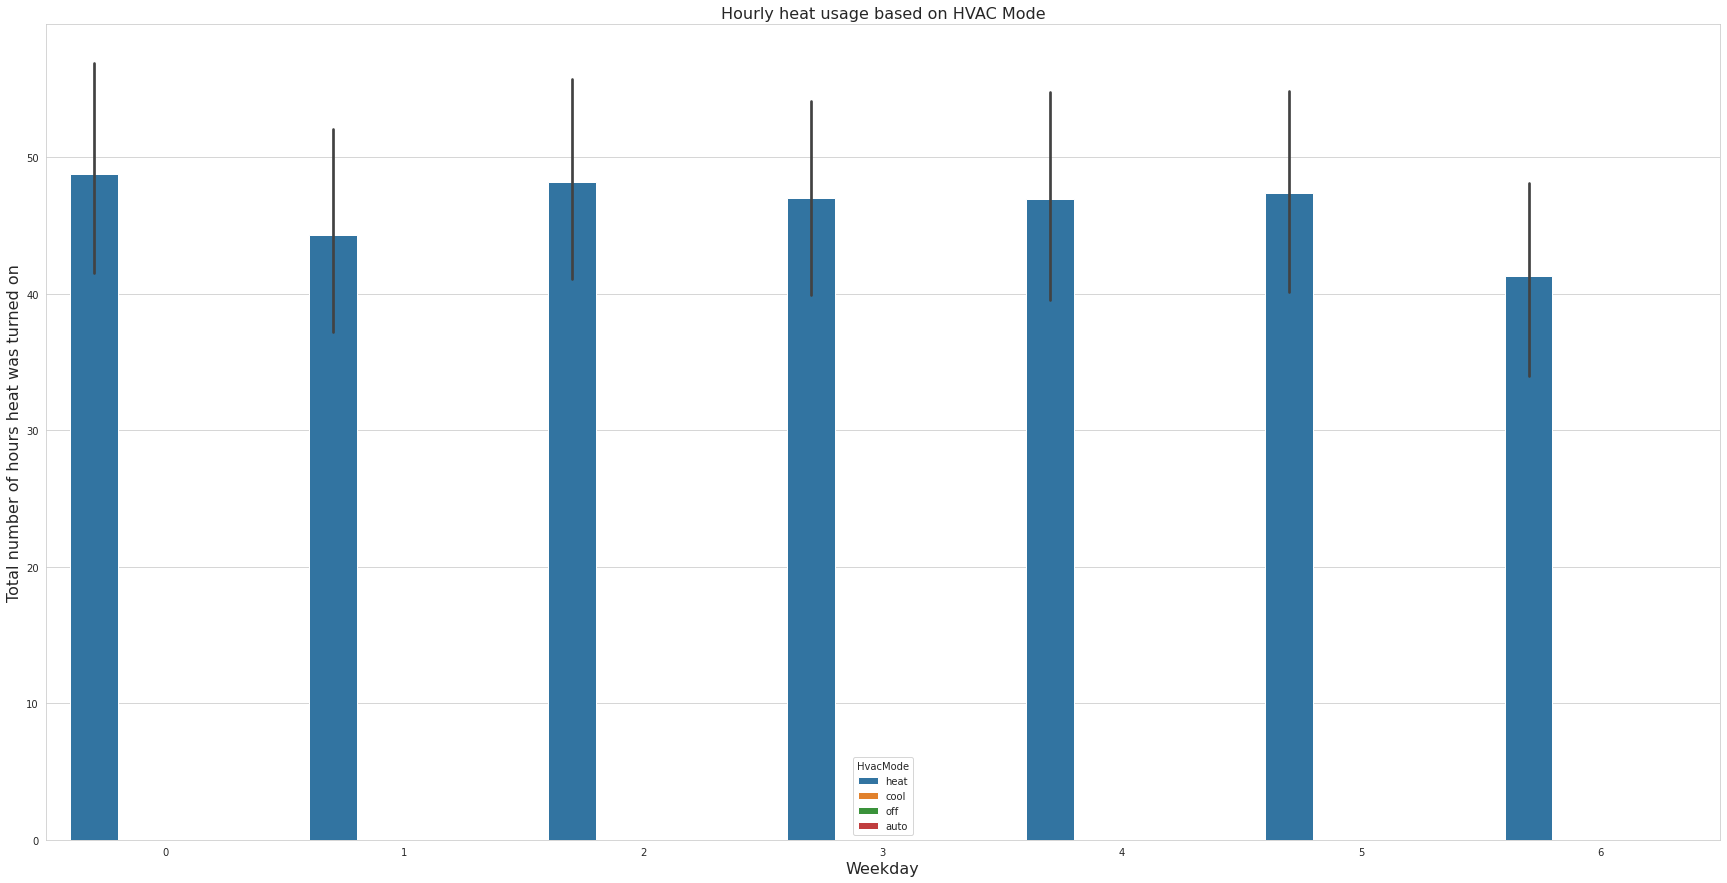

In [ ]:
# now repeat hue plots for HvacMode and Schedule

plt.figure(figsize = (30, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Weekday", y="auxHeat1", data=df1, hue="HvacMode")
tmp.set_xlabel("Weekday", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Hourly heat usage based on HVAC Mode', fontsize = 16)
plt.show()

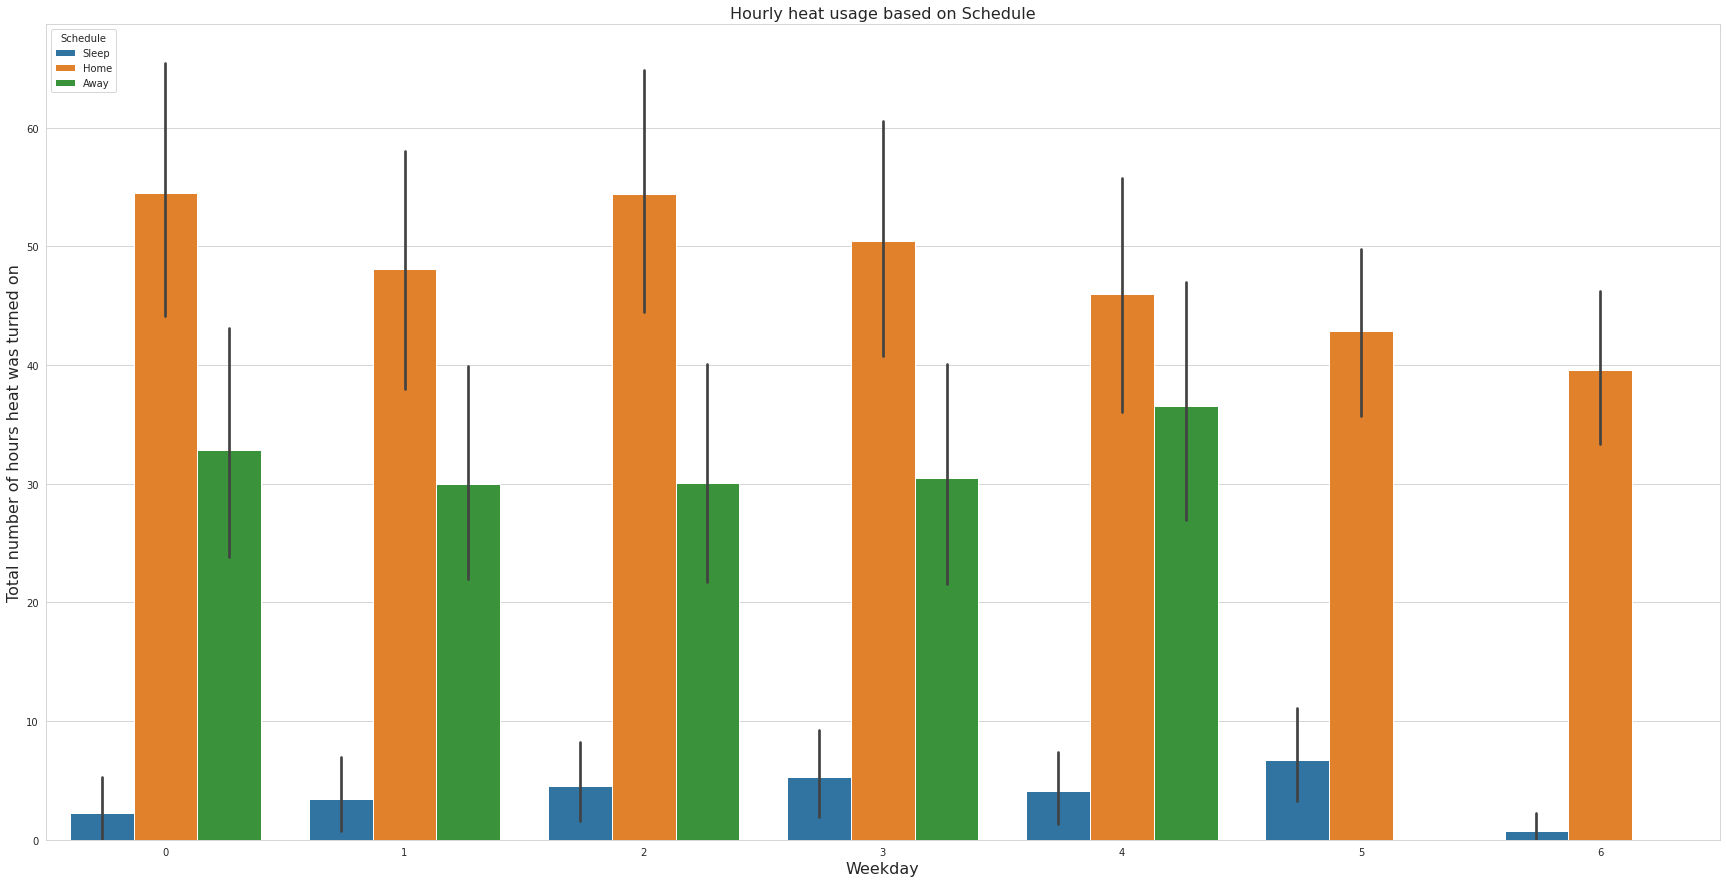

In [ ]:
# now repeat hue plots for HvacMode and Schedule

plt.figure(figsize = (30, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Weekday", y="auxHeat1", data=df1, hue="Schedule")
tmp.set_xlabel("Weekday", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Hourly heat usage based on Schedule', fontsize = 16)
plt.show()

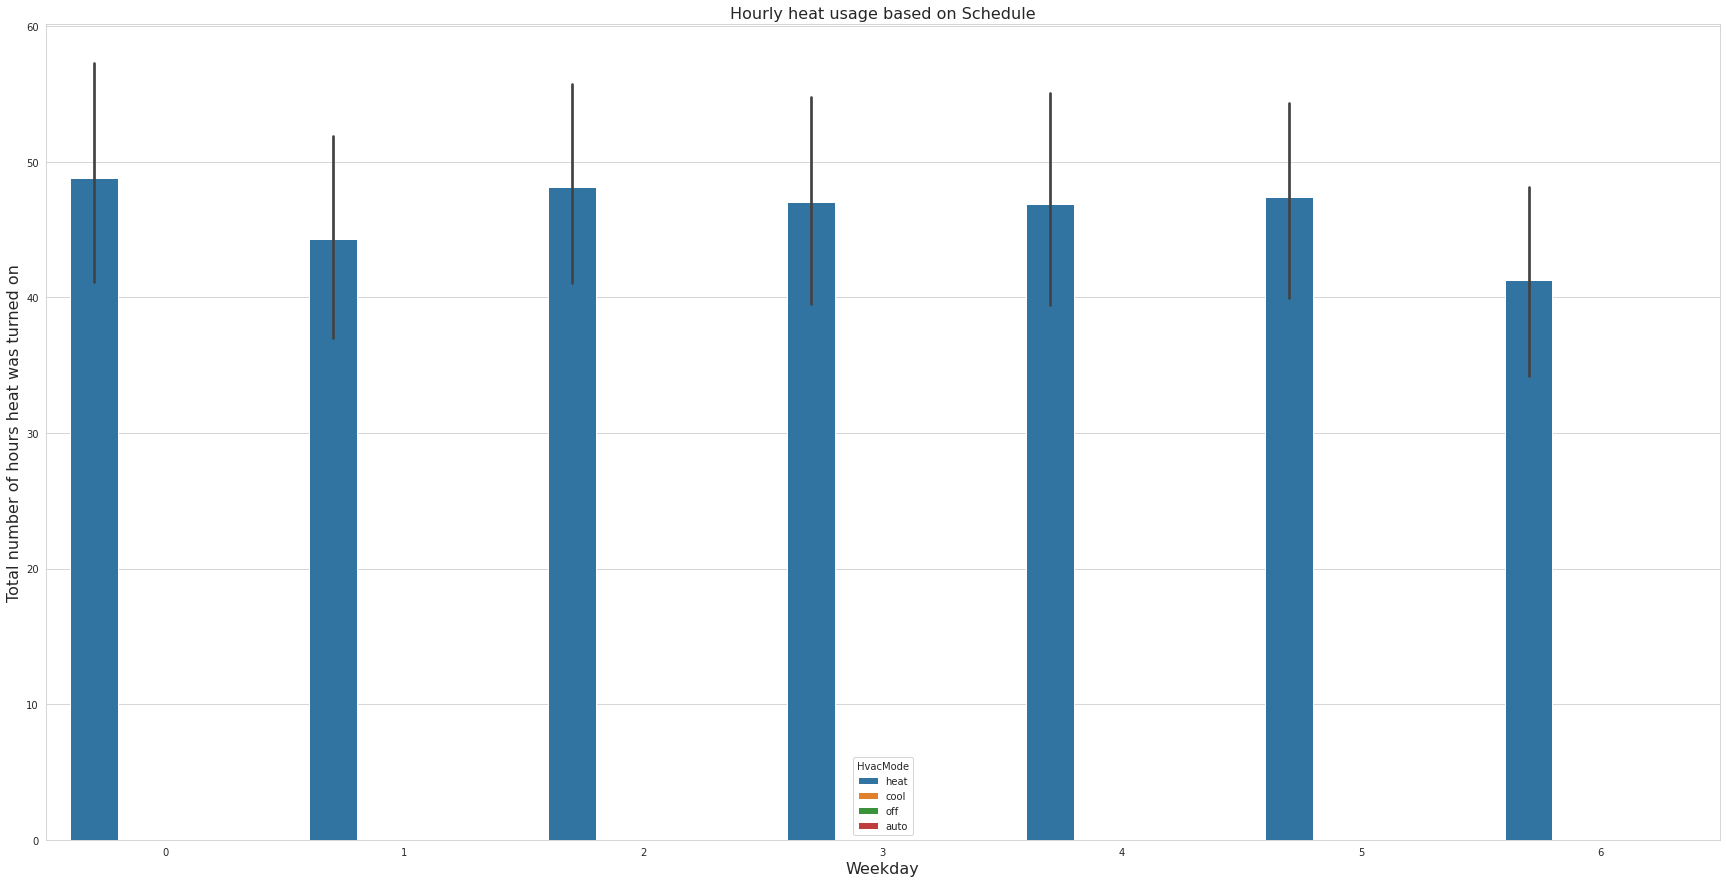

In [ ]:
plt.figure(figsize = (30, 15))
sns.set_style('whitegrid')
tmp = sns.barplot(x="Weekday", y="auxHeat1", data=df1, hue="HvacMode")
tmp.set_xlabel("Weekday", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Hourly heat usage based on Schedule', fontsize = 16)
plt.show()

This is obvious as the only time the heat would be turned on when the HvacMode is set to heat.

# Feature Engineering

By performing feature engineering new variables can be created and provide additional insight which could result in a better understanding of the data and its trends and patterns. Starting with adding a Season column. The hypothesis here is that the trends seen when plotting the Month column will be more apparent when plotting the Seasons.

In [ ]:
# create function that will create season column
def seasons(month):
  if month in [12, 1, 2]:
      tmp = 'Winter'
  elif month in [3, 4, 5]:
      tmp = 'Spring'
  elif month in [6, 7, 8]:
      tmp = 'Summer'
  elif month in [9, 10, 11]:
      tmp = 'Fall'
  return tmp

In [ ]:
df2 = df1.copy()
df2['Season'] = df2['Month'].apply(seasons)
df2.head()

,Weekday,Month,Hour,Day,DateTime,HvacMode,Schedule,T_ctrl,T_stp_cool,T_stp_heat,...,compHeat1,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,Season
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,1,0,1,2019-01-01 00:00:00,heat,Sleep,70.0,71.0,63.0,...,0.0,0.0,45.0,71.0,1.0,69.0,0.0,41.0,95.0,Winter
2019-01-01,1,1,1,1,2019-01-01 01:00:00,heat,Sleep,71.0,71.0,63.0,...,0.0,0.0,45.0,71.0,1.0,69.0,0.0,42.0,94.0,Winter
2019-01-01,1,1,2,1,2019-01-01 02:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,0.0,45.0,70.0,0.0,69.0,0.0,42.0,93.0,Winter
2019-01-01,1,1,3,1,2019-01-01 03:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,0.0,45.0,69.0,0.0,69.0,0.0,39.0,90.0,Winter
2019-01-01,1,1,4,1,2019-01-01 04:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,0.0,45.0,68.0,0.0,69.0,0.0,35.0,86.0,Winter


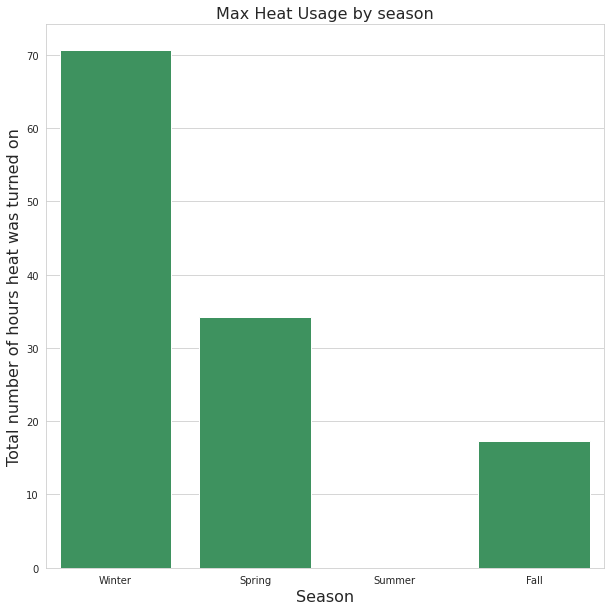

In [ ]:
# repeating previous plots with seasons variable

plt.figure(figsize = (10, 10))
sns.set_style('whitegrid')
tmp = sns.barplot(data = df2, x = 'Season', y = 'auxHeat1', color = '#30a05c', ci=None)
tmp.set_xlabel("Season", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Max Heat Usage by season', fontsize = 16)
plt.show()

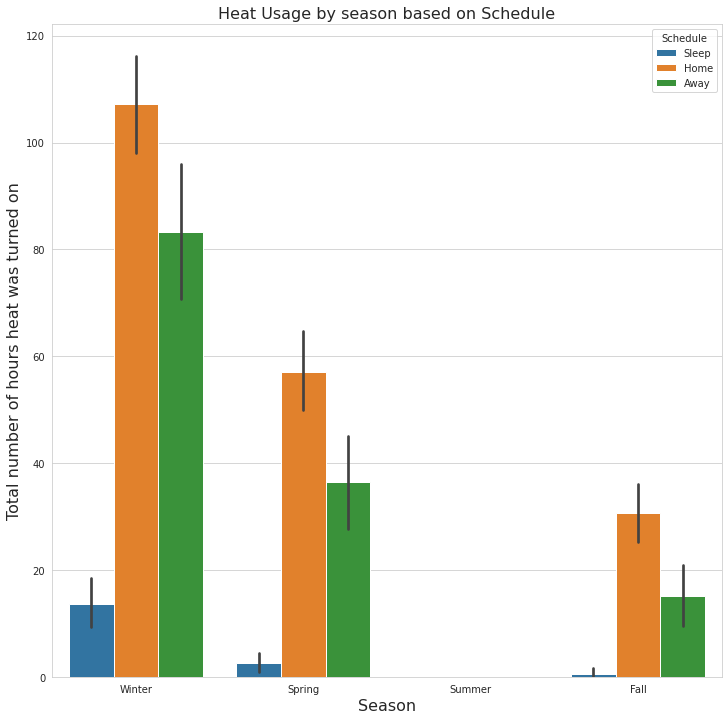

In [ ]:
# repeating Schedule with seasons variable

plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
tmp = sns.barplot(data = df2, x = 'Season', y = 'auxHeat1', hue="Schedule")
tmp.set_xlabel("Season", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Heat Usage by season based on Schedule', fontsize = 16)
plt.show()

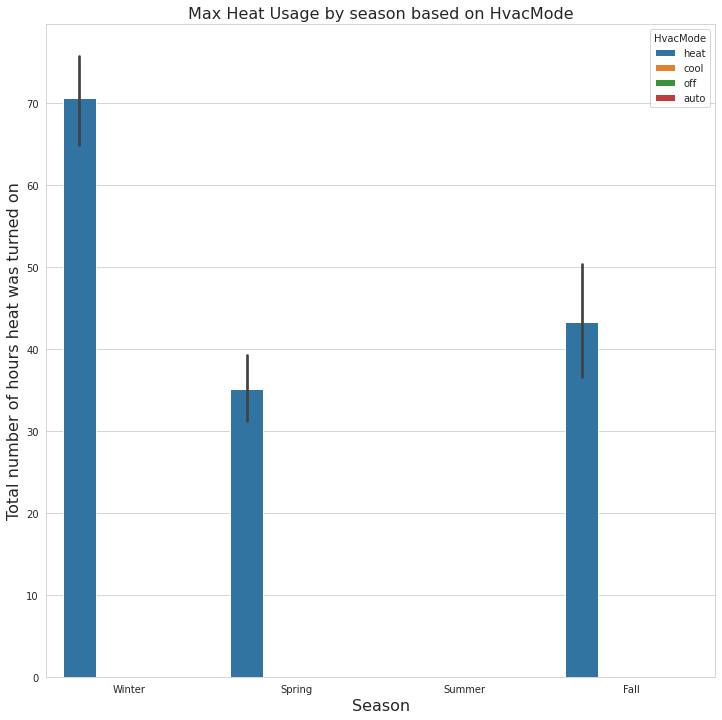

In [ ]:
# repeating HvacMode with seasons variable

plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
tmp = sns.barplot(data = df2, x = 'Season', y = 'auxHeat1', hue="HvacMode")
tmp.set_xlabel("Season", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Max Heat Usage by season based on HvacMode', fontsize = 16)
plt.show()

As expected the heat is turned on the most during the winter and the least in the summer. Interestingly enough the heat was turned on more when away then when asleep.

Now looking at only months of october to May

In [ ]:
df3 = df2.copy()
df3 = df3[df3['Month'].isin([10,11,12,1,2,3,4,5])]
df3.tail() # since the data always starts at janurary

,Weekday,Month,Hour,Day,DateTime,HvacMode,Schedule,T_ctrl,T_stp_cool,T_stp_heat,...,compHeat1,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,Season
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,1,12,19,31,2019-12-31 19:00:00,heat,Home,67.0,72.0,68.0,...,0.0,0.0,75.0,67.0,0.0,67.0,0.0,31.0,77.0,Winter
2019-12-31,1,12,20,31,2019-12-31 20:00:00,heat,Home,68.0,72.0,68.0,...,0.0,0.0,75.0,68.0,0.0,69.0,0.0,30.0,79.0,Winter
2019-12-31,1,12,21,31,2019-12-31 21:00:00,heat,Home,67.0,72.0,68.0,...,0.0,0.0,75.0,67.0,0.0,67.0,0.0,29.0,77.0,Winter
2019-12-31,1,12,22,31,2019-12-31 22:00:00,heat,Home,68.0,72.0,68.0,...,0.0,0.0,75.0,68.0,0.0,69.0,0.0,29.0,76.0,Winter
2019-12-31,1,12,23,31,2019-12-31 23:00:00,heat,Sleep,67.0,72.0,64.0,...,0.0,0.0,75.0,67.0,0.0,67.0,0.0,31.0,68.0,Winter


In [ ]:
df3.describe()

,Weekday,Month,Hour,Day,T_ctrl,T_stp_cool,T_stp_heat,Humidity,HumidityExpectedLow,HumidityExpectedHigh,...,compCool2,compHeat1,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
count,5498.000000,5498.000000,5498.000000,5498.000000,5498.00000,5498.000000,5498.000000,5498.000000,5498.0,5498.0,...,5498.0,5498.0,5498.0,5498.000000,5498.000000,5498.000000,5498.000000,5498.000000,5498.000000,5498.000000
mean,3.000728,6.251910,11.432703,15.844489,69.24518,72.068752,66.725355,32.459440,0.0,0.0,...,0.0,0.0,0.0,139.749909,69.111313,0.236268,69.087668,0.072754,38.068934,70.346672
std,1.981633,4.067649,6.957152,8.834583,2.20776,1.356703,3.370173,8.554159,0.0,0.0,...,0.0,0.0,0.0,139.002090,2.490728,0.424827,1.919318,0.259755,13.953787,14.100262
min,0.000000,1.000000,0.000000,1.000000,62.00000,62.000000,61.000000,14.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,61.000000,0.000000,61.000000,0.000000,-6.000000,25.000000
25%,1.000000,3.000000,5.000000,8.000000,68.00000,71.000000,64.000000,26.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,68.000000,0.000000,68.000000,0.000000,30.000000,61.000000
50%,3.000000,5.000000,11.000000,16.000000,69.00000,72.000000,67.000000,31.000000,0.0,0.0,...,0.0,0.0,0.0,60.000000,69.000000,0.000000,69.000000,0.000000,38.000000,71.000000
75%,5.000000,11.000000,18.000000,23.000000,71.00000,73.000000,70.000000,38.000000,0.0,0.0,...,0.0,0.0,0.0,300.000000,71.000000,0.000000,70.000000,0.000000,48.000000,81.000000
max,6.000000,12.000000,23.000000,31.000000,77.00000,76.000000,76.000000,58.000000,0.0,0.0,...,0.0,0.0,0.0,300.000000,78.000000,1.000000,77.000000,1.000000,85.000000,100.000000


Now lets creat a new variable that is the difference between the thermostat temperature and the heat steping point 'T_step_heat'

In [ ]:
df3['delta'] = df3['Thermostat_Temperature'] - df3['T_stp_heat']
df3.head()

,Weekday,Month,Hour,Day,DateTime,HvacMode,Schedule,T_ctrl,T_stp_cool,T_stp_heat,...,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,Season,delta
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,1,0,1,2019-01-01 00:00:00,heat,Sleep,70.0,71.0,63.0,...,0.0,45.0,71.0,1.0,69.0,0.0,41.0,95.0,Winter,8.0
2019-01-01,1,1,1,1,2019-01-01 01:00:00,heat,Sleep,71.0,71.0,63.0,...,0.0,45.0,71.0,1.0,69.0,0.0,42.0,94.0,Winter,8.0
2019-01-01,1,1,2,1,2019-01-01 02:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,45.0,70.0,0.0,69.0,0.0,42.0,93.0,Winter,7.0
2019-01-01,1,1,3,1,2019-01-01 03:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,45.0,69.0,0.0,69.0,0.0,39.0,90.0,Winter,6.0
2019-01-01,1,1,4,1,2019-01-01 04:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,45.0,68.0,0.0,69.0,0.0,35.0,86.0,Winter,5.0


In [ ]:
# rearrange columns for better readability
df3 = df3[['Weekday', 'Month','Hour', 'Day','DateTime', 'HvacMode',
                        'Schedule', 'T_ctrl', 'T_stp_cool',
                         'T_stp_heat','delta', 'Humidity', 'HumidityExpectedLow', 'HumidityExpectedHigh',
                         'auxHeat1', 'auxHeat2', 'auxHeat3', 'compCool1', 'compCool2',
                         'compHeat1', 'compHeat2', 'fan', 'Thermostat_Temperature',
                         'Thermostat_Motion', 'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion', 'T_out', 'RH_out']]
df3.head()

,Weekday,Month,Hour,Day,DateTime,HvacMode,Schedule,T_ctrl,T_stp_cool,T_stp_heat,...,compCool2,compHeat1,compHeat2,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,1,0,1,2019-01-01 00:00:00,heat,Sleep,70.0,71.0,63.0,...,0.0,0.0,0.0,45.0,71.0,1.0,69.0,0.0,41.0,95.0
2019-01-01,1,1,1,1,2019-01-01 01:00:00,heat,Sleep,71.0,71.0,63.0,...,0.0,0.0,0.0,45.0,71.0,1.0,69.0,0.0,42.0,94.0
2019-01-01,1,1,2,1,2019-01-01 02:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,0.0,0.0,45.0,70.0,0.0,69.0,0.0,42.0,93.0
2019-01-01,1,1,3,1,2019-01-01 03:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,0.0,0.0,45.0,69.0,0.0,69.0,0.0,39.0,90.0
2019-01-01,1,1,4,1,2019-01-01 04:00:00,heat,Sleep,69.0,71.0,63.0,...,0.0,0.0,0.0,45.0,68.0,0.0,69.0,0.0,35.0,86.0


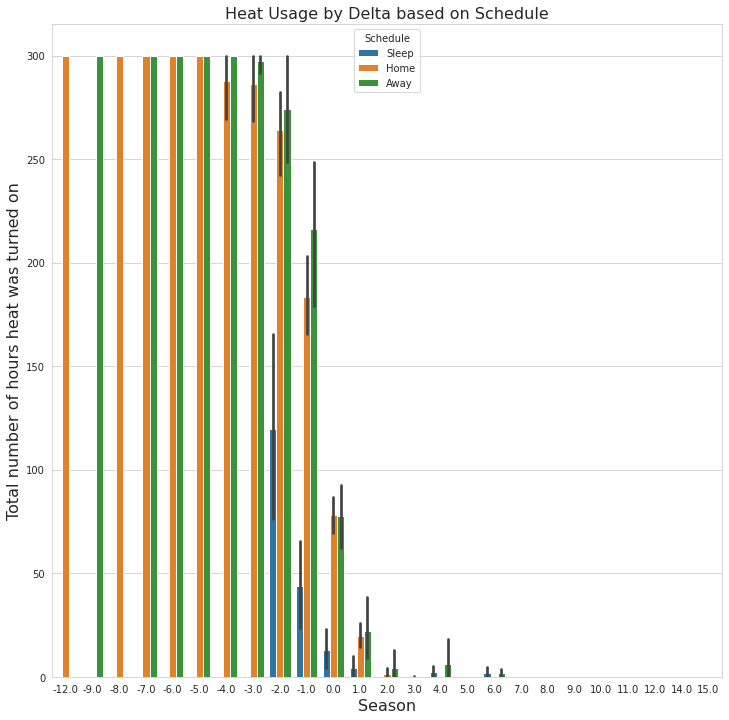

In [ ]:
# now replot heat use with HvacMode and Schedule

plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
tmp = sns.barplot(data = df3, x = 'delta', y = 'auxHeat1', hue="Schedule")
tmp.set_xlabel("Season", fontsize = 16)
tmp.set_ylabel('Total number of hours heat was turned on', fontsize = 16)
plt.title('Heat Usage by Delta based on Schedule', fontsize = 16)
plt.show()

It can bee seen that the graph is messy and does not provide any useful info. Let's plot the value counts

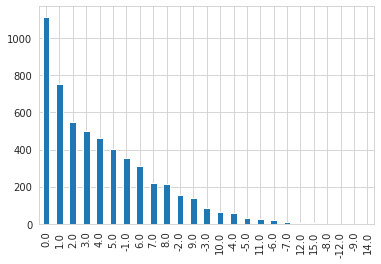

In [ ]:
df3['delta'].value_counts().plot.bar()
plt.show()

The value counts appear to follow a right skewed noraml distrubtion where the moajority of the points being when the difference between the heat step point and the indoor temeprature is 0

The feature Tools library autamoates feature engineering. Which can be seen below

In [ ]:
es = ft.EntitySet("Temp data")
es = es.add_dataframe(
    dataframe_name="Temp_data",
    dataframe=df2,
    index="date",
    time_index="DateTime")
es # printing entitiy description

/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entityset.py:1864: UserWarning: index date not found in dataframe, creating new integer column
  "integer column".format(index)


Entityset: Temp data
  DataFrames:
    Temp_data [Rows: 8396, Columns: 29]
  Relationships:
    No relationships

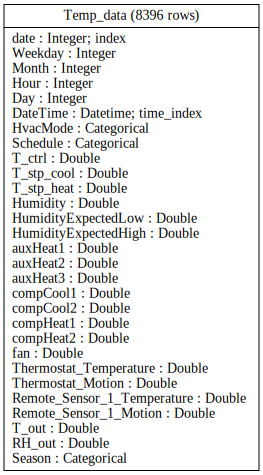

In [ ]:
es.plot("relationships.png")

Interestingly enough there appears to be no significant relationships between the data. Below the deep feature synthesis function is applied

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name="Temp_data",
                                      max_depth=1)
feature_matrix

,Weekday,Month,Hour,Day,HvacMode,Schedule,T_ctrl,T_stp_cool,T_stp_heat,Humidity,...,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,Season,DAY(DateTime),MONTH(DateTime),WEEKDAY(DateTime),YEAR(DateTime)
date,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,heat,Sleep,70.0,71.0,63.0,38.0,...,1.0,69.0,0.0,41.0,95.0,Winter,1,1,1,2019
1,1,1,1,1,heat,Sleep,71.0,71.0,63.0,40.0,...,1.0,69.0,0.0,42.0,94.0,Winter,1,1,1,2019
2,1,1,2,1,heat,Sleep,69.0,71.0,63.0,37.0,...,0.0,69.0,0.0,42.0,93.0,Winter,1,1,1,2019
3,1,1,3,1,heat,Sleep,69.0,71.0,63.0,35.0,...,0.0,69.0,0.0,39.0,90.0,Winter,1,1,1,2019
4,1,1,4,1,heat,Sleep,69.0,71.0,63.0,35.0,...,0.0,69.0,0.0,35.0,86.0,Winter,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8391,1,12,19,31,heat,Home,67.0,72.0,68.0,29.0,...,0.0,67.0,0.0,31.0,77.0,Winter,31,12,1,2019
8392,1,12,20,31,heat,Home,68.0,72.0,68.0,28.0,...,0.0,69.0,0.0,30.0,79.0,Winter,31,12,1,2019
8393,1,12,21,31,heat,Home,67.0,72.0,68.0,29.0,...,0.0,67.0,0.0,29.0,77.0,Winter,31,12,1,2019


In [ ]:
feature_defs

[<Feature: Weekday>,
 <Feature: Month>,
 <Feature: Hour>,
 <Feature: Day>,
 <Feature: HvacMode>,
 <Feature: Schedule>,
 <Feature: T_ctrl>,
 <Feature: T_stp_cool>,
 <Feature: T_stp_heat>,
 <Feature: Humidity>,
 <Feature: HumidityExpectedLow>,
 <Feature: HumidityExpectedHigh>,
 <Feature: auxHeat1>,
 <Feature: auxHeat2>,
 <Feature: auxHeat3>,
 <Feature: compCool1>,
 <Feature: compCool2>,
 <Feature: compHeat1>,
 <Feature: compHeat2>,
 <Feature: fan>,
 <Feature: Thermostat_Temperature>,
 <Feature: Thermostat_Motion>,
 <Feature: Remote_Sensor_1_Temperature>,
 <Feature: Remote_Sensor_1_Motion>,
 <Feature: T_out>,
 <Feature: RH_out>,
 <Feature: Season>,
 <Feature: DAY(DateTime)>,
 <Feature: MONTH(DateTime)>,
 <Feature: WEEKDAY(DateTime)>,
 <Feature: YEAR(DateTime)>]

Now Looking at the weather data

In [ ]:
# following the same intial steps of checking null values, cleaning data and correlation matrix
data = pd.read_csv('combined_data.csv',encoding= 'unicode_escape')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data["date"] = pd.DatetimeIndex(data['DateTime']).date # add date column
data.set_index('date',inplace=True) 
data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,DateTime,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 00:00:00,2019,1,1,0:00,4.5,...,NaN,6.4,NaN,97.29,NaN,NaN,NaN,NaN,NaN,"Drizzle,Fog"
2019-01-01,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 01:00:00,2019,1,1,1:00,4.4,...,NaN,9.7,NaN,97.32,NaN,NaN,NaN,NaN,NaN,"Drizzle,Fog"
2019-01-01,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 02:00:00,2019,1,1,2:00,2.4,...,NaN,9.7,NaN,97.54,NaN,NaN,NaN,NaN,NaN,"Rain,Drizzle,Fog"
2019-01-01,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 03:00:00,2019,1,1,3:00,2.2,...,NaN,19.3,NaN,97.89,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 04:00:00,2019,1,1,4:00,1.9,...,NaN,24.1,NaN,98.16,NaN,NaN,NaN,NaN,NaN,Cloudy


In [ ]:
data.describe()

,Longitude (x),Latitude (y),Climate ID,Year,Month,Day,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,...,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag
count,8.760000e+03,8.760000e+03,8760.0,8760.0,8760.000000,8760.000000,8759.000000,0.0,8759.000000,0.0,...,8759.000000,0.0,8759.000000,0.0,8759.000000,0.0,1253.000000,0.0,2201.000000,0.0
mean,-7.963000e+01,4.368000e+01,6158731.0,2019.0,6.526027,15.720548,8.338692,NaN,2.788092,NaN,...,17.976481,NaN,21.725608,NaN,99.537628,NaN,29.861931,NaN,-12.150841,NaN
std,4.121383e-12,5.741513e-12,0.0,0.0,3.448048,8.796749,11.108152,NaN,10.612656,NaN,...,9.070158,NaN,5.622079,NaN,0.787239,NaN,3.720584,NaN,6.533408,NaN
min,-7.963000e+01,4.368000e+01,6158731.0,2019.0,1.000000,1.000000,-22.600000,NaN,-28.400000,NaN,...,0.000000,NaN,0.200000,NaN,96.570000,NaN,25.000000,NaN,-38.000000,NaN
25%,-7.963000e+01,4.368000e+01,6158731.0,2019.0,4.000000,8.000000,0.000000,NaN,-5.100000,NaN,...,12.000000,NaN,24.100000,NaN,99.040000,NaN,27.000000,NaN,-15.000000,NaN
50%,-7.963000e+01,4.368000e+01,6158731.0,2019.0,7.000000,16.000000,8.100000,NaN,3.400000,NaN,...,17.000000,NaN,24.100000,NaN,99.540000,NaN,29.000000,NaN,-11.000000,NaN
75%,-7.963000e+01,4.368000e+01,6158731.0,2019.0,10.000000,23.000000,17.700000,NaN,11.200000,NaN,...,23.000000,NaN,24.100000,NaN,100.070000,NaN,32.000000,NaN,-7.000000,NaN
max,-7.963000e+01,4.368000e+01,6158731.0,2019.0,12.000000,31.000000,32.400000,NaN,25.100000,NaN,...,67.000000,NaN,80.500000,NaN,102.010000,NaN,44.000000,NaN,-1.000000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2019-01-01 to 2019-12-31
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Longitude (x)        8760 non-null   float64       
 1   Latitude (y)         8760 non-null   float64       
 2   Station Name         8760 non-null   object        
 3   Climate ID           8760 non-null   int64         
 4   DateTime             8760 non-null   datetime64[ns]
 5   Year                 8760 non-null   int64         
 6   Month                8760 non-null   int64         
 7   Day                  8760 non-null   int64         
 8   Time                 8760 non-null   object        
 9   Temp (°C)            8759 non-null   float64       
 10  Temp Flag            0 non-null      float64       
 11  Dew Point Temp (°C)  8759 non-null   float64       
 12  Dew Point Temp Flag  0 non-null      float64       
 13  Rel Hum (%)          87

In [ ]:
data.isnull().sum()

Longitude (x)             0
Latitude (y)              0
Station Name              0
Climate ID                0
DateTime                  0
Year                      0
Month                     0
Day                       0
Time                      0
Temp (°C)                 1
Temp Flag              8760
Dew Point Temp (°C)       1
Dew Point Temp Flag    8760
Rel Hum (%)               1
Rel Hum Flag           8760
Wind Dir (10s deg)        3
Wind Dir Flag          8760
Wind Spd (km/h)           1
Wind Spd Flag          8760
Visibility (km)           1
Visibility Flag        8760
Stn Press (kPa)           1
Stn Press Flag         8760
Hmdx                   7507
Hmdx Flag              8760
Wind Chill             6559
Wind Chill Flag        8760
Weather                4768
dtype: int64

Some columns have 0 data so these will be removed

In [ ]:
data = data.drop(labels = ['Temp Flag', 'Dew Point Temp Flag','Rel Hum Flag', 'Wind Dir Flag', 'Wind Spd Flag', 'Visibility Flag', 'Stn Press Flag', 'Hmdx Flag', 'Wind Chill Flag'], 
                          axis = 1)

In [ ]:
# if wind chill or Hmdx is 0 that means no wind chill on that day so null value can be set to 0
data["Wind Chill"].fillna(0, inplace = True)
data["Hmdx"].fillna(0, inplace = True)

In [ ]:
data.isnull().sum() # rechecking the data

Longitude (x)             0
Latitude (y)              0
Station Name              0
Climate ID                0
DateTime                  0
Year                      0
Month                     0
Day                       0
Time                      0
Temp (°C)                 1
Dew Point Temp (°C)       1
Rel Hum (%)               1
Wind Dir (10s deg)        3
Wind Spd (km/h)           1
Visibility (km)           1
Stn Press (kPa)           1
Hmdx                      0
Wind Chill                0
Weather                4768
dtype: int64

In [ ]:
corr = data.corr() # starting with the correlation between variables
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Longitude (x),Latitude (y),Climate ID,Year,Month,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill
Longitude (x),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Latitude (y),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Climate ID,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Month,nan,nan,nan,nan,1.000000,0.011893,0.303676,0.357854,0.181827,-0.180897,-0.047214,0.075878,-0.033358,0.104026,0.353564
Day,nan,nan,nan,nan,0.011893,1.000000,0.032402,0.036632,0.014975,-0.003774,0.045545,-0.016329,-0.046985,0.030622,-0.004530
Temp (°C),nan,nan,nan,nan,0.303676,0.032402,1.000000,0.944376,-0.146089,-0.148954,-0.094868,0.214201,-0.267746,0.595808,0.741093
Dew Point Temp (°C),nan,nan,nan,nan,0.357854,0.036632,0.944376,1.000000,0.182310,-0.188941,-0.140905,0.083860,-0.362293,0.547975,0.752928
Rel Hum (%),nan,nan,nan,nan,0.181827,0.014975,-0.146089,0.182310,1.000000,-0.136122,-0.135015,-0.453816,-0.316537,-0.140912,0.070577
Wind Dir (10s deg),nan,nan,nan,nan,-0.180897,-0.003774,-0.148954,-0.188941,-0.136122,1.000000,0.182012,0.110042,-0.112150,-0.010391,-0.142675


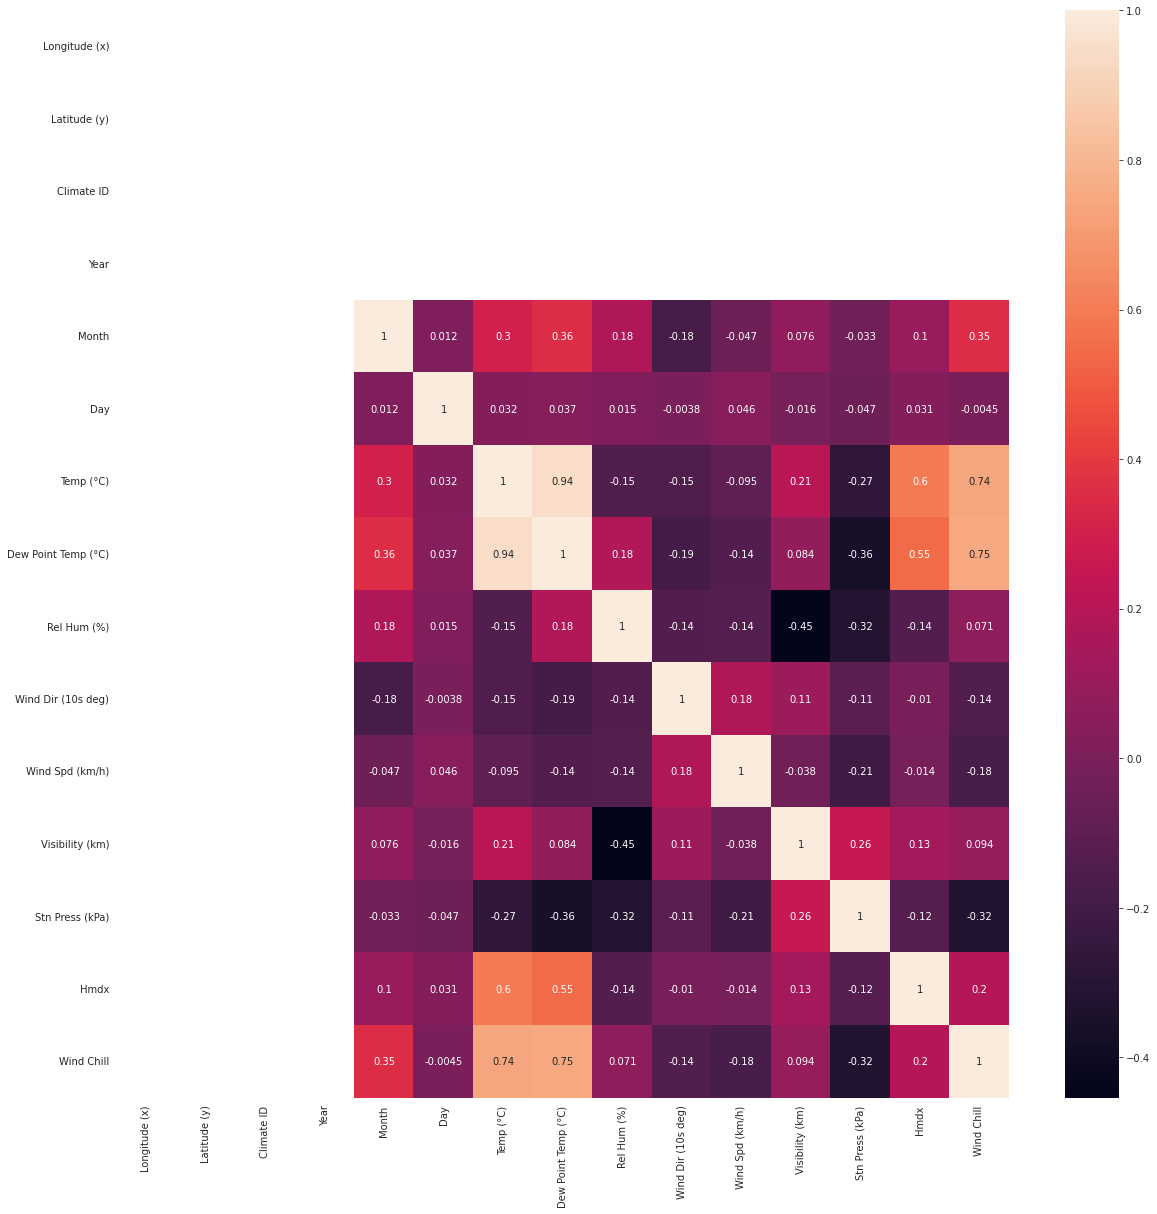

In [ ]:
# replotting corrletion matrix using seaborn
plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(), annot=True)

Variables with strong correlation are:


1.   Hmdx & Temp (C) (0.6)
2.   Hmdx & Dew Point (C) (0.55)
3.   Wind Chill & Temp (C) (0.74)
4.   Wind Chill & Dew Point Temp (C) (0.75)

This makes sense as the humidty or wind chill directly affects the current temperature.



[Text(0, 0.5, 'Dew Point Temp (°C)'), Text(0.5, 0, 'Wind Chill')]

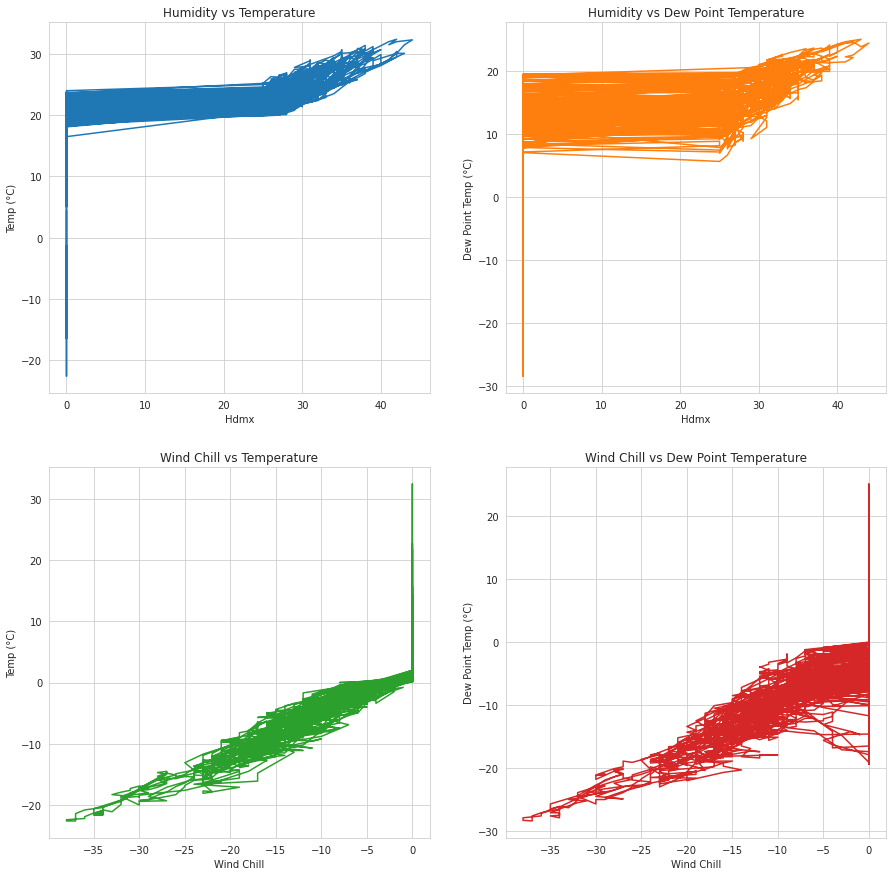

In [ ]:
# plotting the above variables against each other
x = ['Hdmx','Wind Chill']
y = ['Temp (°C)', 'Dew Point Temp (°C)']
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].plot(data['Hmdx'], data['Temp (°C)'])
axs[0, 0].set_title('Humidity vs Temperature')
axs[0,0].set(xlabel=x[0], ylabel=y[0])

axs[0, 1].plot(data['Hmdx'], data['Dew Point Temp (°C)'], 'tab:orange')
axs[0, 1].set_title('Humidity vs Dew Point Temperature')
axs[0,1].set(xlabel=x[0], ylabel=y[1])

axs[1, 0].plot(data['Wind Chill'], data['Temp (°C)'], 'tab:green')
axs[1, 0].set_title('Wind Chill vs Temperature')
axs[1,0].set(xlabel=x[1], ylabel=y[0])

axs[1, 1].plot(data['Wind Chill'], data['Dew Point Temp (°C)'], 'tab:red')
axs[1, 1].set_title('Wind Chill vs Dew Point Temperature')
axs[1,1].set(xlabel=x[1], ylabel=y[1])

The plot do not give any additional information and are messy. Maybe flipping the data points will give a better insight.

[Text(0, 0.5, 'Wind Chill'), Text(0.5, 0, 'Dew Point Temp (°C)')]

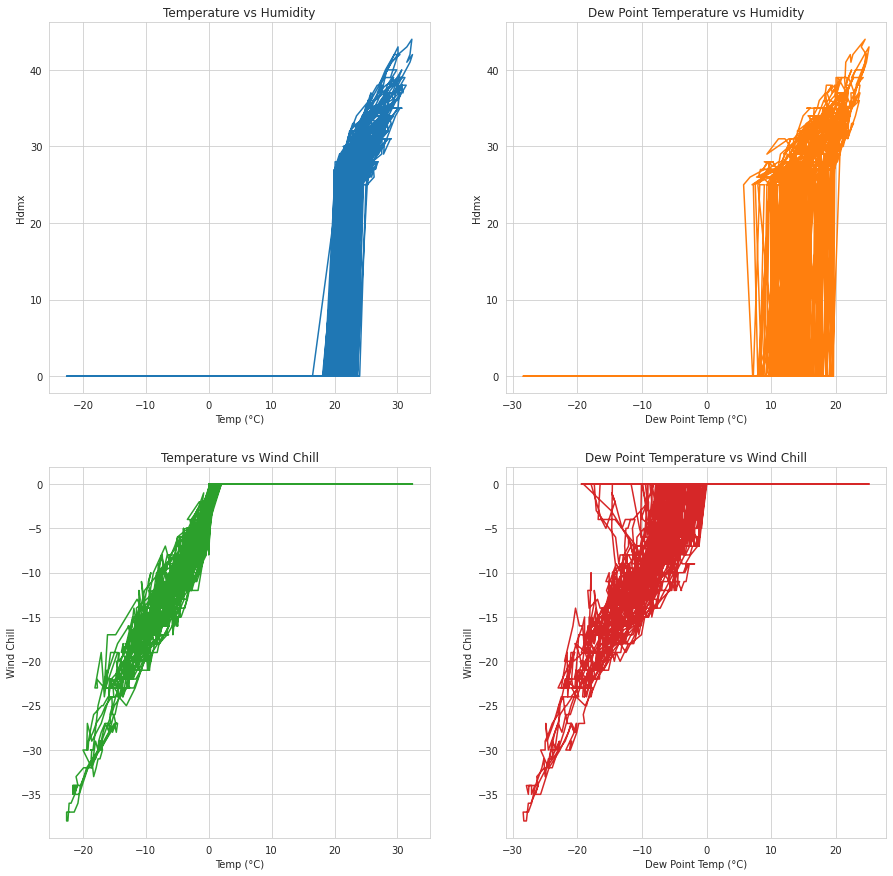

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].plot(data['Temp (°C)'],data['Hmdx'])
axs[0, 0].set_title('Temperature vs Humidity')
axs[0,0].set(xlabel=y[0], ylabel=x[0])

axs[0, 1].plot(data['Dew Point Temp (°C)'], data['Hmdx'], 'tab:orange')
axs[0, 1].set_title('Dew Point Temperature vs Humidity')
axs[0,1].set(xlabel=y[1], ylabel=x[0])

axs[1, 0].plot(data['Temp (°C)'], data['Wind Chill'], 'tab:green')
axs[1, 0].set_title('Temperature vs Wind Chill')
axs[1,0].set(xlabel=y[0], ylabel=x[1])

axs[1, 1].plot(data['Dew Point Temp (°C)'], data['Wind Chill'], 'tab:red')
axs[1, 1].set_title('Dew Point Temperature vs Wind Chill')
axs[1,1].set(xlabel=y[1], ylabel=x[1])

These plots are not useful either.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95523f64d0>,
      dtype=object)

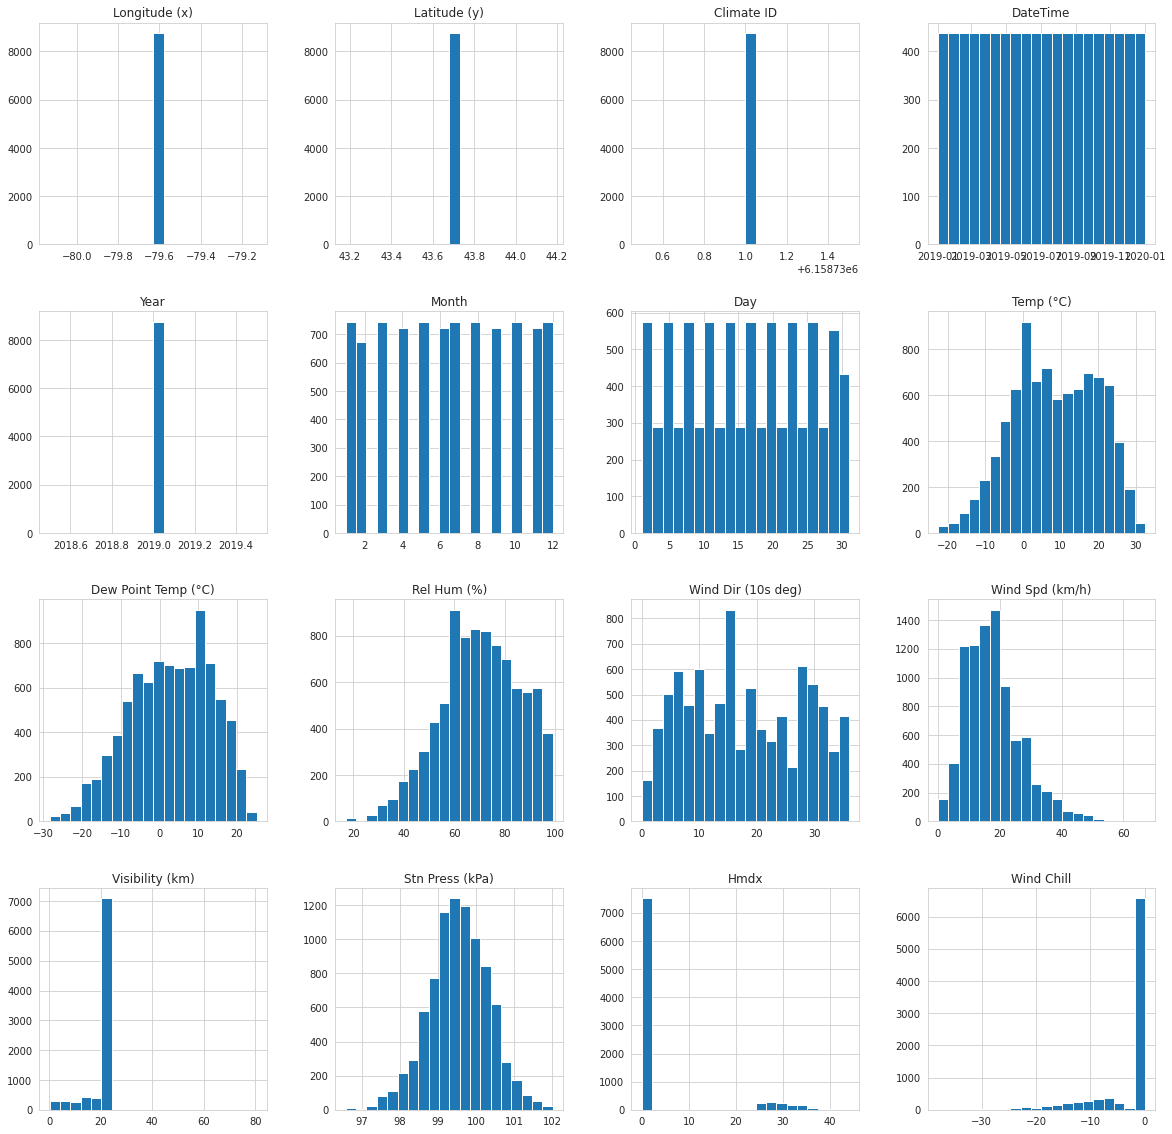

In [ ]:
data.hist(bins = 20 , figsize= (20,20)) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

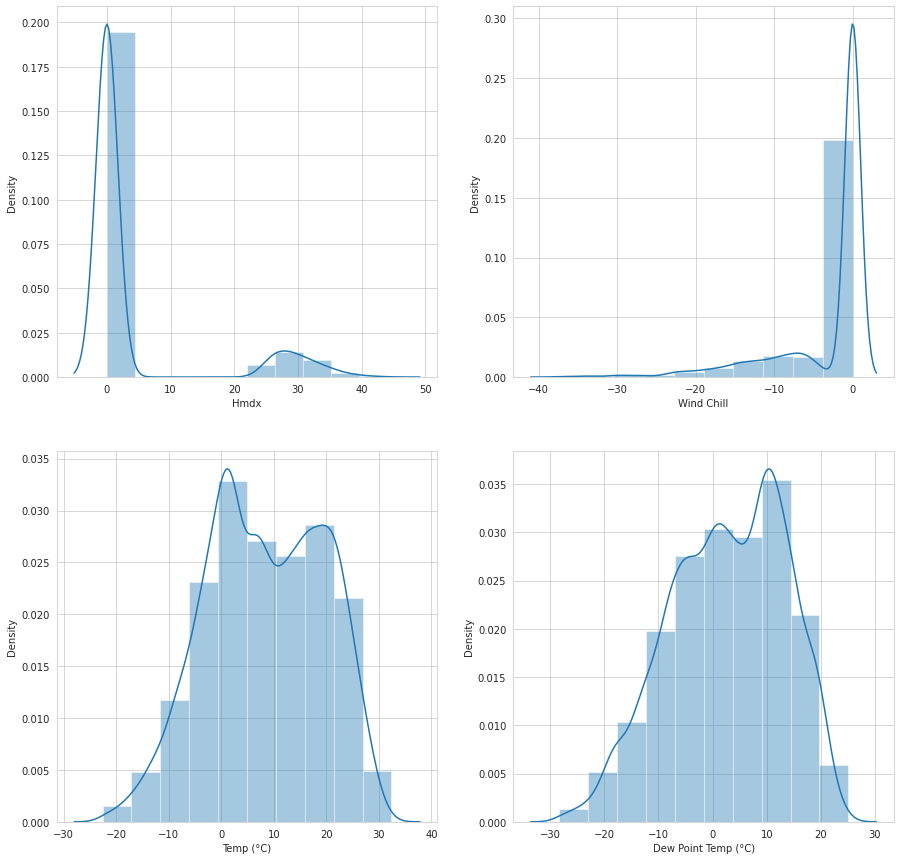

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,15)) # distrubtion plot in form of bar and line graph
tmp1 = sns.distplot(data["Hmdx"], bins=10, ax = ax[0][0])
tmp2 = sns.distplot(data["Wind Chill"], bins=10, ax = ax[0][1])
tmp3 = sns.distplot(data["Temp (°C)"],bins=10, ax = ax[1][0])
tmp4 = sns.distplot(data["Dew Point Temp (°C)"],bins=10, ax =ax[1][1])

In [ ]:
# filtering to match the Ecobee data
data = data[data['Month'].isin([10,11,12,1,2,3,4,5])]
data.tail()

,Longitude (x),Latitude (y),Station Name,Climate ID,DateTime,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
date,,,,,,,,,,,,,,,,,,,
2019-12-31,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 19:00:00,2019,12,31,19:00,-0.8,-3.8,80.0,24.0,22.0,24.1,97.96,0.0,-7.0,Mostly Cloudy
2019-12-31,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 20:00:00,2019,12,31,20:00,-1.0,-4.2,79.0,24.0,21.0,24.1,98.00,0.0,-7.0,NaN
2019-12-31,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 21:00:00,2019,12,31,21:00,-1.1,-4.5,78.0,25.0,25.0,24.1,98.01,0.0,-7.0,NaN
2019-12-31,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 22:00:00,2019,12,31,22:00,-1.5,-4.5,80.0,24.0,19.0,24.1,98.05,0.0,-7.0,Clear
2019-12-31,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 23:00:00,2019,12,31,23:00,-1.2,-4.3,80.0,26.0,27.0,24.1,98.07,0.0,-8.0,NaN


In [ ]:
# combining the 2 csv files into 1 and saving it
final = pd.concat([df3, data], axis=0)
final.head()

,Weekday,Month,Hour,Day,DateTime,HvacMode,Schedule,T_ctrl,T_stp_cool,T_stp_heat,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1.0,1,0.0,1,2019-01-01 00:00:00,heat,Sleep,70.0,71.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,1.0,1,1.0,1,2019-01-01 01:00:00,heat,Sleep,71.0,71.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,1.0,1,2.0,1,2019-01-01 02:00:00,heat,Sleep,69.0,71.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,1.0,1,3.0,1,2019-01-01 03:00:00,heat,Sleep,69.0,71.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,1.0,1,4.0,1,2019-01-01 04:00:00,heat,Sleep,69.0,71.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# save file, will require me to convert to csv and use text to column function
final.to_csv("final_data", sep='\t')